# Create Profile features dataset & prediction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
%matplotlib inline

In [2]:
api_calls_day = pd.Timestamp('2019-06-13')
churn_cutoff = api_calls_day - pd.Timedelta(3,'M')

In [3]:
df_friend_summary = pd.read_csv('100k_friend_summary.csv',dtype={'steamid': int}).drop('Unnamed: 0',axis='columns')
df_profile_summary = pd.read_csv('100k_clean_player_info.csv',dtype={'steamid': int}).drop('Unnamed: 0',axis='columns')
df_per_game_summary = pd.read_csv('100k_per_game.csv',dtype={'steamid': int}).drop('Unnamed: 0',axis='columns')
df_game_per_user_summary = pd.read_csv('100k_game_per_user.csv',dtype={'steamid': int}).drop('Unnamed: 0',axis='columns')
df_top5game_per_user_summary = pd.read_csv('100k_top5game_per_user.csv',dtype={'steamid': int}).drop('Unnamed: 0',axis='columns')

In [4]:
df_friend_summary.info()
df_friend_summary.nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85357 entries, 0 to 85356
Data columns (total 10 columns):
num_Friends              85357 non-null int64
steamid                  85357 non-null int64
newest_friend_time       85357 non-null int64
newest_friend_steamid    85357 non-null int64
oldest_friend_time       85357 non-null int64
oldest_friend_steamid    85357 non-null int64
Root                     85357 non-null bool
First_tier               85357 non-null bool
Second_tier              85357 non-null bool
Third_tier               85357 non-null bool
dtypes: bool(4), int64(6)
memory usage: 4.2 MB


num_Friends               1344
steamid                  85357
newest_friend_time       84331
newest_friend_steamid    79071
oldest_friend_time       71214
oldest_friend_steamid    78570
Root                         2
First_tier                   1
Second_tier                  1
Third_tier                   1
dtype: int64

In [5]:
df_profile_summary.info()
df_profile_summary.nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88555 entries, 0 to 88554
Data columns (total 17 columns):
commentpermission       88555 non-null float64
lastlogoff              88500 non-null float64
loccityid               24114 non-null float64
loccountrycode          67198 non-null object
locstatecode            41695 non-null object
personaname             88551 non-null object
profilestate            88142 non-null float64
realname                56858 non-null object
steamid                 88555 non-null int64
timecreated             88555 non-null float64
costom_avatar           88555 non-null int64
isPublic                88555 non-null int64
isFriendsOnly           88555 non-null int64
isPrivate               88555 non-null int64
lastlogoff_readable     88500 non-null object
timecreated_readable    88555 non-null object
inClan                  88555 non-null int64
dtypes: float64(5), int64(6), object(6)
memory usage: 11.5+ MB


commentpermission           3
lastlogoff              83785
loccityid                6499
loccountrycode            250
locstatecode              357
personaname             84785
profilestate                3
realname                39361
steamid                 88555
timecreated             88535
costom_avatar               2
isPublic                    1
isFriendsOnly               1
isPrivate                   1
lastlogoff_readable     83785
timecreated_readable    88535
inClan                      1
dtype: int64

In [6]:
df_per_game_summary.info()
df_per_game_summary.nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27862 entries, 0 to 27861
Data columns (total 9 columns):
appid                            27862 non-null int64
playtime_forever_sum             27862 non-null float64
playtime_forever_count           27862 non-null int64
playtime_forever_mean            27862 non-null float64
playtime_forever_std             27824 non-null float64
playtime_forever_sum_noZero      27862 non-null float64
playtime_forever_count_noZero    27862 non-null int64
playtime_forever_mean_noZero     27862 non-null float64
playtime_forever_std_noZero      25316 non-null float64
dtypes: float64(6), int64(3)
memory usage: 1.9 MB


appid                            27862
playtime_forever_sum             19029
playtime_forever_count            3953
playtime_forever_mean            24843
playtime_forever_std             26532
playtime_forever_sum_noZero      19029
playtime_forever_count_noZero     2731
playtime_forever_mean_noZero     22100
playtime_forever_std_noZero      24305
dtype: int64

In [7]:
df_game_per_user_summary.info()
df_game_per_user_summary.nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25093 entries, 0 to 25092
Data columns (total 10 columns):
steamid                         25093 non-null int64
playtime_forever_sum            25093 non-null int64
appid_count                     25093 non-null int64
playtime_forever_mean           25093 non-null float64
playtime_forever_std            25039 non-null float64
appid_max                       25093 non-null int64
playtime_forever_max            25093 non-null int64
appid_count_noZero              25093 non-null int64
playtime_forever_mean_noZero    25093 non-null float64
playtime_forever_std_noZero     24983 non-null float64
dtypes: float64(4), int64(6)
memory usage: 1.9 MB


steamid                         25074
playtime_forever_sum            24635
appid_count                      3702
playtime_forever_mean           25076
playtime_forever_std            25039
appid_max                        1140
playtime_forever_max            23347
appid_count_noZero               2510
playtime_forever_mean_noZero    25069
playtime_forever_std_noZero     24982
dtype: int64

In [8]:
df_top5game_per_user_summary.info()
df_top5game_per_user_summary.nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124459 entries, 0 to 124458
Data columns (total 3 columns):
appid               124459 non-null int64
playtime_forever    124459 non-null int64
steamid             124459 non-null int64
dtypes: int64(3)
memory usage: 2.8 MB


appid                3898
playtime_forever    58559
steamid             25093
dtype: int64

In [9]:
df_full_prof = df_friend_summary.merge(df_profile_summary,on='steamid',how='right')

In [10]:
df_full_prof.head()

,num_Friends,steamid,newest_friend_time,newest_friend_steamid,oldest_friend_time,oldest_friend_steamid,Root,First_tier,Second_tier,Third_tier,...,profilestate,realname,timecreated,costom_avatar,isPublic,isFriendsOnly,isPrivate,lastlogoff_readable,timecreated_readable,inClan
0,9.0,76561197960265730,1.455907e+09,7.656120e+16,1.347314e+09,7.656120e+16,False,False,False,True,...,1.0,Alfred,1.063193e+09,1,1,0,0,2019-06-09 22:34:52,2003-09-10 11:27:21,1
1,174.0,76561197960265731,1.534047e+09,7.656120e+16,0.000000e+00,7.656120e+16,False,False,False,True,...,1.0,Erik Johnson,1.063192e+09,1,1,0,0,2019-06-10 21:41:25,2003-09-10 11:14:46,1
2,70.0,76561197960265733,1.498068e+09,7.656120e+16,0.000000e+00,7.656120e+16,False,False,False,True,...,1.0,NaN,1.063193e+09,1,1,0,0,2019-01-15 22:57:20,2003-09-10 11:27:13,1
3,91.0,76561197960265738,1.548740e+09,7.656120e+16,0.000000e+00,7.656120e+16,False,False,False,True,...,1.0,Greg Coomer,1.063233e+09,1,1,0,0,2019-06-01 07:00:25,2003-09-10 22:23:18,1
4,66.0,76561197960265743,1.534368e+09,7.656120e+16,0.000000e+00,7.656120e+16,False,False,False,True,...,1.0,Taylor Sherman,1.063236e+09,1,1,0,0,2019-05-07 18:02:30,2003-09-10 23:21:13,1


In [11]:
df_full_prof.info()
df_full_prof.nunique()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88555 entries, 0 to 88554
Data columns (total 26 columns):
num_Friends              85357 non-null float64
steamid                  88555 non-null int64
newest_friend_time       85357 non-null float64
newest_friend_steamid    85357 non-null float64
oldest_friend_time       85357 non-null float64
oldest_friend_steamid    85357 non-null float64
Root                     85357 non-null object
First_tier               85357 non-null object
Second_tier              85357 non-null object
Third_tier               85357 non-null object
commentpermission        88555 non-null float64
lastlogoff               88500 non-null float64
loccityid                24114 non-null float64
loccountrycode           67198 non-null object
locstatecode             41695 non-null object
personaname              88551 non-null object
profilestate             88142 non-null float64
realname                 56858 non-null object
timecreated              88555 non-nu

num_Friends               1344
steamid                  88555
newest_friend_time       84331
newest_friend_steamid    78943
oldest_friend_time       71214
oldest_friend_steamid    78080
Root                         2
First_tier                   1
Second_tier                  1
Third_tier                   1
commentpermission            3
lastlogoff               83785
loccityid                 6499
loccountrycode             250
locstatecode               357
personaname              84785
profilestate                 3
realname                 39361
timecreated              88535
costom_avatar                2
isPublic                     1
isFriendsOnly                1
isPrivate                    1
lastlogoff_readable      83785
timecreated_readable     88535
inClan                       1
dtype: int64

In [12]:
steamid_list_orig = set(df_full_prof['steamid'].unique())

In [13]:
len(steamid_list_orig)

88555

In [14]:
#df_full_prof['newest_friend_time'] = df_full_prof['newest_friend_time'].map(lambda x: pd.Timestamp(x))
#df_full_prof['oldest_friend_time'] = df_full_prof['oldest_friend_time'].map(lambda x: pd.Timestamp(x))
#df_full_prof['lastlogoff_readable'] = df_full_prof['lastlogoff_readable'].map(lambda x: pd.Timestamp(x))
#df_full_prof['timecreated_readable'] = df_full_prof['timecreated_readable'].map(lambda x: pd.Timestamp(x))

## Choose to drop

newest_friend_steamid, oldest_friend_steamid, Root, First_tier, Second_tier, realname, personaname, loccityid, loccountrycode, locstatecode

In [15]:
df_full_prof = df_full_prof.drop(['lastlogoff_readable','timecreated_readable','newest_friend_steamid', 'oldest_friend_steamid', 'Root', 'First_tier', 'Second_tier', 'Third_tier','realname', 'personaname', 'loccityid', 'loccountrycode', 'locstatecode'],axis='columns')

In [16]:
df_full_prof.head()

,num_Friends,steamid,newest_friend_time,oldest_friend_time,commentpermission,lastlogoff,profilestate,timecreated,costom_avatar,isPublic,isFriendsOnly,isPrivate,inClan
0,9.0,76561197960265730,1.455907e+09,1.347314e+09,0.0,1.560120e+09,1.0,1.063193e+09,1,1,0,0,1
1,174.0,76561197960265731,1.534047e+09,0.000000e+00,1.0,1.560203e+09,1.0,1.063192e+09,1,1,0,0,1
2,70.0,76561197960265733,1.498068e+09,0.000000e+00,0.0,1.547593e+09,1.0,1.063193e+09,1,1,0,0,1
3,91.0,76561197960265738,1.548740e+09,0.000000e+00,1.0,1.559372e+09,1.0,1.063233e+09,1,1,0,0,1
4,66.0,76561197960265743,1.534368e+09,0.000000e+00,0.0,1.557252e+09,1.0,1.063236e+09,1,1,0,0,1


In [17]:
df_full_prof.info()
print(df_full_prof['steamid'].nunique())
df_full_prof.nunique()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88555 entries, 0 to 88554
Data columns (total 13 columns):
num_Friends           85357 non-null float64
steamid               88555 non-null int64
newest_friend_time    85357 non-null float64
oldest_friend_time    85357 non-null float64
commentpermission     88555 non-null float64
lastlogoff            88500 non-null float64
profilestate          88142 non-null float64
timecreated           88555 non-null float64
costom_avatar         88555 non-null int64
isPublic              88555 non-null int64
isFriendsOnly         88555 non-null int64
isPrivate             88555 non-null int64
inClan                88555 non-null int64
dtypes: float64(7), int64(6)
memory usage: 9.5 MB
88555


num_Friends            1344
steamid               88303
newest_friend_time    84331
oldest_friend_time    71214
commentpermission         3
lastlogoff            83785
profilestate              3
timecreated           88535
costom_avatar             2
isPublic                  1
isFriendsOnly             1
isPrivate                 1
inClan                    1
dtype: int64

In [18]:
steamid_list_post = set(df_full_prof['steamid'].unique())

In [19]:
len(steamid_list_post)

88555

In [20]:
list(set(steamid_list_orig) - set(steamid_list_post))

[]

In [21]:
df_full_prof = df_full_prof.merge(df_game_per_user_summary,on='steamid',how='left')

In [22]:
df_full_prof.head()

,num_Friends,steamid,newest_friend_time,oldest_friend_time,commentpermission,lastlogoff,profilestate,timecreated,costom_avatar,isPublic,...,inClan,playtime_forever_sum,appid_count,playtime_forever_mean,playtime_forever_std,appid_max,playtime_forever_max,appid_count_noZero,playtime_forever_mean_noZero,playtime_forever_std_noZero
0,9.0,76561197960265730,1.455907e+09,1.347314e+09,0.0,1.560120e+09,1.0,1.063193e+09,1,1,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,174.0,76561197960265731,1.534047e+09,0.000000e+00,1.0,1.560203e+09,1.0,1.063192e+09,1,1,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,70.0,76561197960265733,1.498068e+09,0.000000e+00,0.0,1.547593e+09,1.0,1.063193e+09,1,1,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,91.0,76561197960265738,1.548740e+09,0.000000e+00,1.0,1.559372e+09,1.0,1.063233e+09,1,1,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,66.0,76561197960265743,1.534368e+09,0.000000e+00,0.0,1.557252e+09,1.0,1.063236e+09,1,1,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
df_full_prof.info()
print(df_full_prof['steamid'].nunique(dropna=True))
print(df_full_prof.nunique())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88555 entries, 0 to 88554
Data columns (total 22 columns):
num_Friends                     85357 non-null float64
steamid                         88555 non-null int64
newest_friend_time              85357 non-null float64
oldest_friend_time              85357 non-null float64
commentpermission               88555 non-null float64
lastlogoff                      88500 non-null float64
profilestate                    88142 non-null float64
timecreated                     88555 non-null float64
costom_avatar                   88555 non-null int64
isPublic                        88555 non-null int64
isFriendsOnly                   88555 non-null int64
isPrivate                       88555 non-null int64
inClan                          88555 non-null int64
playtime_forever_sum            25078 non-null float64
appid_count                     25078 non-null float64
playtime_forever_mean           25078 non-null float64
playtime_forever_std   

In [24]:
#sns.heatmap(df_full_prof.isnull(), cbar=False)

In [25]:
df_full_prof.steamid.nunique(dropna=True)

88555

In [26]:
df_full_prof[df_full_prof.notnull()].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88555 entries, 0 to 88554
Data columns (total 22 columns):
num_Friends                     85357 non-null float64
steamid                         88555 non-null int64
newest_friend_time              85357 non-null float64
oldest_friend_time              85357 non-null float64
commentpermission               88555 non-null float64
lastlogoff                      88500 non-null float64
profilestate                    88142 non-null float64
timecreated                     88555 non-null float64
costom_avatar                   88555 non-null int64
isPublic                        88555 non-null int64
isFriendsOnly                   88555 non-null int64
isPrivate                       88555 non-null int64
inClan                          88555 non-null int64
playtime_forever_sum            25078 non-null float64
appid_count                     25078 non-null float64
playtime_forever_mean           25078 non-null float64
playtime_forever_std   

In [27]:
df_full_null = df_full_prof[df_full_prof.isna().any(axis='columns')]

In [28]:
df_full_null.nunique()

num_Friends                      1053
steamid                         64552
newest_friend_time              60927
oldest_friend_time              49619
commentpermission                   3
lastlogoff                      62374
profilestate                        3
timecreated                     64712
costom_avatar                       2
isPublic                            1
isFriendsOnly                       1
isPrivate                           1
inClan                              1
playtime_forever_sum             1246
appid_count                       700
playtime_forever_mean            1248
playtime_forever_std             1198
appid_max                         213
playtime_forever_max             1239
appid_count_noZero                554
playtime_forever_mean_noZero     1247
playtime_forever_std_noZero      1144
dtype: int64

In [29]:
#sns.heatmap(df_full_null.isnull(), cbar=False)

In [30]:
df_full_prof.fillna(0,inplace=True)

In [31]:
print(churn_cutoff)

2019-03-13 16:32:42


In [32]:
df_full_prof['isChurned'] = df_full_prof['lastlogoff'].map(lambda x: 1 if (pd.to_datetime(x, unit='s') < churn_cutoff) else 0)


In [33]:
#sns.pairplot(data=df_full_prof,hue='isChurned')

In [34]:
#df_full_prof.nunique()

In [35]:
#df_full_prof[df_full_prof['isChurned'] == 1].nunique()

In [36]:
#df_full_prof[df_full_prof['isChurned'] == 0].nunique()

In [37]:
#sns.heatmap(df_full_prof[df_full_prof['isPublic'] == 0].isnull(), cbar=False)

X = df_full_prof.drop(['isChurned', 'lastlogoff','steamid'],axis='columns')

y = df_full_prof['isChurned']

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

rfc = RandomForestClassifier(n_estimators=200)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42,stratify=y)

rfc.fit(X_train,y_train)

from sklearn.metrics import confusion_matrix, classification_report

rfc_pred = rfc.predict(X_test)
print(confusion_matrix(y_test,rfc_pred))
print('\n')
print(classification_report(y_test,rfc_pred))

from sklearn.tree import export_graphviz

# Extract single tree
estimator = rfc.estimators_[5]

# Export as dot file
export_graphviz(estimator, out_file='tree.dot', 
                feature_names = X_train.columns,
                class_names = "Target",
                rounded = True, proportion = False, 
                precision = 2, filled = True)

# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')

rfc.feature_importances_

for i in range(0,len(rfc.feature_importances_)):
    if rfc.feature_importances_[i] > 0.05:
        print(X_test.columns[i])

prob_class_active = []
prob_class_churned = []
for x in rfc.predict_proba(X_test):
    prob_class_active.append(x[0])
    prob_class_churned.append(x[1])

for x in rfc.predict_proba(X_train):
    prob_class_active.append(x[0])
    prob_class_churned.append(x[1])

sns.distplot(prob_class_active,bins=8,kde=False)

sns.distplot(prob_class_churned,bins=8,kde=False)

df_full_prof['Bad_Friend_Date'] = df_full_prof['timecreated'].map(lambda x: 1 if (pd.to_datetime(x, unit='s') > churn_cutoff) else 0)

df_full_prof[df_full_prof['Bad_Friend_Date'] == 1]

features = ['num_Friends','newest_friend_time','commentpermission','timecreated','costom_avatar','playtime_forever_sum','playtime_forever_max','appid_count_noZero']


X_limit = df_full_prof[features]

X_train, X_test, y_train, y_test = train_test_split(X_limit, y, test_size=0.3, random_state=42,stratify=y)

rfc.fit(X_train,y_train)

rfc_pred = rfc.predict(X_test)
print(confusion_matrix(y_test,rfc_pred))
print('\n')
print(classification_report(y_test,rfc_pred))

# Extract single tree
estimator = rfc.estimators_[5]

# Export as dot file
export_graphviz(estimator, out_file='tree.dot', 
                feature_names = X_train.columns,
                class_names = "Target",
                rounded = True, proportion = False, 
                precision = 2, filled = True)

# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')

rfc.feature_importances_

prob_class_active = []
prob_class_churned = []
for x in rfc.predict_proba(X_test):
    prob_class_active.append(x[0])
    prob_class_churned.append(x[1])

for x in rfc.predict_proba(X_train):
    prob_class_active.append(x[0])
    prob_class_churned.append(x[1])

sns.distplot(prob_class_active,bins=8,kde=False)

sns.distplot(prob_class_churned,bins=8,kde=False)

cm = confusion_matrix(y_test,rfc_pred)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax,cmap='Blues')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['Active', 'Churned'])
ax.yaxis.set_ticklabels(['Active', 'Chruned'])

prob_class_active = []
prob_class_churned = []
for x in rfc.predict_proba(df_full_prof[features]):
    prob_class_active.append(x[0])
    prob_class_churned.append(x[1])
df_full_prof['Prob_Active'] = prob_class_active
df_full_prof['Prob_Churn'] = prob_class_churned

df_full_prof.head()

import lime
import lime.lime_tabular

# Create the LIME Explainer
explainer = lime.lime_tabular.LimeTabularExplainer(df_full_prof[features].values,  
mode='classification',training_labels=df_full_prof['isChurned'],feature_names=features)

i = 18
prob= [df_full_prof['Prob_Active'].loc[i],df_full_prof['Prob_Churn'].loc[i]]
print(df_full_prof[features].loc[i].values)
print(prob)
exp = explainer.explain_instance(df_full_prof[features].loc[i].values, rfc.predict_proba, num_features=len(features))
exp.show_in_notebook()

exp.as_list()

#df_full_prof['Prob_Churn'] > 0.5

import pickle

# save the model to disk
filename = 'randomforest_steam_profile_model.sav'
#pickle.dump(rfc, open(filename, 'wb'))
 

df_full_prof.info()

In [38]:
df_friend_full = pd.read_csv('player_friend_info_100k.csv',dtype={'steamid': int}).drop('Unnamed: 0',axis='columns')

In [39]:
df_friend_full = df_friend_full[pd.to_datetime(df_friend_full['friend_since'], unit='s') < churn_cutoff]

In [40]:
df_friend_large = pd.merge(df_friend_full,df_full_prof,on='steamid')

In [41]:
df_friend_large.head()

,friend_since,relationship,steamid,steamid_orig,num_Friends,newest_friend_time,oldest_friend_time,commentpermission,lastlogoff,profilestate,...,playtime_forever_sum,appid_count,playtime_forever_mean,playtime_forever_std,appid_max,playtime_forever_max,appid_count_noZero,playtime_forever_mean_noZero,playtime_forever_std_noZero,isChurned
0,1434524498,friend,76561198007070703,76561198199710782,493.0,1.551610e+09,1.245376e+09,1.0,1.560234e+09,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,1455556043,friend,76561198007070703,76561198119327769,493.0,1.551610e+09,1.245376e+09,1.0,1.560234e+09,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,1488713631,friend,76561198007070703,76561198302636934,493.0,1.551610e+09,1.245376e+09,1.0,1.560234e+09,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,1424045974,friend,76561198007070703,76561198035000472,493.0,1.551610e+09,1.245376e+09,1.0,1.560234e+09,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,1403982908,friend,76561198007070703,76561198022371464,493.0,1.551610e+09,1.245376e+09,1.0,1.560234e+09,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [42]:
df_friend_large.info()
print(df_friend_large['steamid'].nunique())
print(df_friend_large.nunique())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1840383 entries, 0 to 1840382
Data columns (total 26 columns):
friend_since                    int64
relationship                    object
steamid                         int64
steamid_orig                    int64
num_Friends                     float64
newest_friend_time              float64
oldest_friend_time              float64
commentpermission               float64
lastlogoff                      float64
profilestate                    float64
timecreated                     float64
costom_avatar                   int64
isPublic                        int64
isFriendsOnly                   int64
isPrivate                       int64
inClan                          int64
playtime_forever_sum            float64
appid_count                     float64
playtime_forever_mean           float64
playtime_forever_std            float64
appid_max                       float64
playtime_forever_max            float64
appid_count_noZero      

In [43]:
df_friend_large = df_friend_large.drop(['relationship','friend_since','newest_friend_time','oldest_friend_time','lastlogoff','profilestate','timecreated','isPublic','isFriendsOnly','isPrivate','playtime_forever_max','playtime_forever_std','playtime_forever_std_noZero'],axis='columns')



In [44]:
df_friend_large.head()

,steamid,steamid_orig,num_Friends,commentpermission,costom_avatar,inClan,playtime_forever_sum,appid_count,playtime_forever_mean,appid_max,appid_count_noZero,playtime_forever_mean_noZero,isChurned
0,76561198007070703,76561198199710782,493.0,1.0,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0
1,76561198007070703,76561198119327769,493.0,1.0,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0
2,76561198007070703,76561198302636934,493.0,1.0,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0
3,76561198007070703,76561198035000472,493.0,1.0,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0
4,76561198007070703,76561198022371464,493.0,1.0,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0


In [45]:
df_friend_large.info()
print(df_friend_large['steamid'].nunique())
print(df_friend_large.nunique())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1840383 entries, 0 to 1840382
Data columns (total 13 columns):
steamid                         int64
steamid_orig                    int64
num_Friends                     float64
commentpermission               float64
costom_avatar                   int64
inClan                          int64
playtime_forever_sum            float64
appid_count                     float64
playtime_forever_mean           float64
appid_max                       float64
appid_count_noZero              float64
playtime_forever_mean_noZero    float64
isChurned                       int64
dtypes: float64(8), int64(5)
memory usage: 196.6 MB
87723
steamid                         87474
steamid_orig                    84409
num_Friends                      1345
commentpermission                   3
costom_avatar                       2
inClan                              1
playtime_forever_sum            24264
appid_count                      3700
playtime_foreve

In [46]:
df_friends_list = pd.DataFrame(df_friend_large.groupby('steamid_orig')['steamid'].apply(list))

In [47]:
df_friends_list = df_friends_list.add_suffix('_friend_list')
df_friends_list = df_friends_list.reset_index()
df_friends_list['steamid'] = df_friends_list['steamid_orig']
df_friends_list = df_friends_list.drop('steamid_orig',axis='columns')
df_friends_list.head()

,steamid_friend_list,steamid
0,"[76561197960265733, 76561197969518075, 7656119...",76561197960265730
1,"[76561198014273977, 76561197969204208, 7656119...",76561197960265731
2,"[76561197966407225, 76561197991348132, 7656119...",76561197960265733
3,"[76561198262909170, 76561197965686610, 7656119...",76561197960265738
4,"[76561197969393927, 76561197978266558, 7656119...",76561197960265743


In [48]:
df_friends_list.head()

,steamid_friend_list,steamid
0,"[76561197960265733, 76561197969518075, 7656119...",76561197960265730
1,"[76561198014273977, 76561197969204208, 7656119...",76561197960265731
2,"[76561197966407225, 76561197991348132, 7656119...",76561197960265733
3,"[76561198262909170, 76561197965686610, 7656119...",76561197960265738
4,"[76561197969393927, 76561197978266558, 7656119...",76561197960265743


In [49]:
df_friends_list.info()
df_friends_list['steamid'].nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84637 entries, 0 to 84636
Data columns (total 2 columns):
steamid_friend_list    84637 non-null object
steamid                84637 non-null int64
dtypes: int64(1), object(1)
memory usage: 1.3+ MB


84637

In [50]:
df_friends_mean = pd.DataFrame(df_friend_large.drop(['steamid','appid_max'],axis='columns').groupby('steamid_orig').mean())

In [51]:
df_friends_mean.head()

,num_Friends,commentpermission,costom_avatar,inClan,playtime_forever_sum,appid_count,playtime_forever_mean,appid_count_noZero,playtime_forever_mean_noZero,isChurned
steamid_orig,,,,,,,,,,
76561197960265730,137.333333,0.166667,1.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.166667
76561197960265731,158.583333,0.273810,1.000000,1.0,21384.964286,83.059524,24.914479,27.642857,67.770969,0.119048
76561197960265733,141.309524,0.333333,1.000000,1.0,15670.214286,78.785714,16.414644,40.309524,36.069376,0.095238
76561197960265738,131.507463,0.268657,0.985075,1.0,26715.447761,102.134328,42.687874,42.447761,101.412194,0.253731
76561197960265743,93.395833,0.208333,0.833333,1.0,38946.187500,95.062500,34.489156,48.750000,72.782834,0.291667


In [52]:
df_friends_mean = df_friends_mean.add_suffix('_friends_mean')

In [53]:
df_friends_mean = df_friends_mean.reset_index()
df_friends_mean['steamid'] = df_friends_mean['steamid_orig']
df_friends_mean = df_friends_mean.drop('steamid_orig',axis='columns')

In [54]:
df_friends_mean.info()
df_friends_mean['steamid'].nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84637 entries, 0 to 84636
Data columns (total 11 columns):
num_Friends_friends_mean                     84637 non-null float64
commentpermission_friends_mean               84637 non-null float64
costom_avatar_friends_mean                   84637 non-null float64
inClan_friends_mean                          84637 non-null float64
playtime_forever_sum_friends_mean            84637 non-null float64
appid_count_friends_mean                     84637 non-null float64
playtime_forever_mean_friends_mean           84637 non-null float64
appid_count_noZero_friends_mean              84637 non-null float64
playtime_forever_mean_noZero_friends_mean    84637 non-null float64
isChurned_friends_mean                       84637 non-null float64
steamid                                      84637 non-null int64
dtypes: float64(10), int64(1)
memory usage: 7.1 MB


84637

In [55]:
df_friends_mode = pd.DataFrame(df_friend_large[df_friend_large['appid_max'] != 0].groupby('steamid_orig')['appid_max'].apply(pd.Series.mode))

In [56]:
df_friends_mode.head()

,,appid_max
steamid_orig,,
76561197960265731,0,72850.0
76561197960265733,0,578080.0
76561197960265738,0,72850.0
76561197960265743,0,578080.0
76561197960265744,0,730.0


In [57]:
df_friends_mode = df_friends_mode.reset_index().drop('level_1',axis='columns')
df_friends_mode['steamid'] = df_friends_mode['steamid_orig']
df_friends_mode['friends_fav_appid'] = df_friends_mode['appid_max']
df_friends_mode = df_friends_mode.drop('steamid_orig',axis='columns')
df_friends_mode = df_friends_mode.drop('appid_max',axis='columns')
df_friends_mode = df_friends_mode.drop_duplicates(['steamid'],keep='first')
df_friends_mode.info()
print(df_friends_mode['steamid'].nunique())
print(df_friends_mean['steamid'].nunique())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65214 entries, 0 to 105551
Data columns (total 2 columns):
steamid              65214 non-null int64
friends_fav_appid    65214 non-null float64
dtypes: float64(1), int64(1)
memory usage: 1.5 MB
65214
84637


In [58]:
df_friends_stats = pd.merge(df_friends_mean,df_friends_mode,on='steamid',how='outer')

In [59]:
df_friends_stats.head()

,num_Friends_friends_mean,commentpermission_friends_mean,costom_avatar_friends_mean,inClan_friends_mean,playtime_forever_sum_friends_mean,appid_count_friends_mean,playtime_forever_mean_friends_mean,appid_count_noZero_friends_mean,playtime_forever_mean_noZero_friends_mean,isChurned_friends_mean,steamid,friends_fav_appid
0,137.333333,0.166667,1.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.166667,76561197960265730,NaN
1,158.583333,0.273810,1.000000,1.0,21384.964286,83.059524,24.914479,27.642857,67.770969,0.119048,76561197960265731,72850.0
2,141.309524,0.333333,1.000000,1.0,15670.214286,78.785714,16.414644,40.309524,36.069376,0.095238,76561197960265733,578080.0
3,131.507463,0.268657,0.985075,1.0,26715.447761,102.134328,42.687874,42.447761,101.412194,0.253731,76561197960265738,72850.0
4,93.395833,0.208333,0.833333,1.0,38946.187500,95.062500,34.489156,48.750000,72.782834,0.291667,76561197960265743,578080.0


In [60]:
df_friends_stats.nunique()
print(df_friends_stats['steamid'].nunique())

84637


In [61]:
df_full_prof['steamid'].nunique()

88555

In [62]:
df_full_prof.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88555 entries, 0 to 88554
Data columns (total 23 columns):
num_Friends                     88555 non-null float64
steamid                         88555 non-null int64
newest_friend_time              88555 non-null float64
oldest_friend_time              88555 non-null float64
commentpermission               88555 non-null float64
lastlogoff                      88555 non-null float64
profilestate                    88555 non-null float64
timecreated                     88555 non-null float64
costom_avatar                   88555 non-null int64
isPublic                        88555 non-null int64
isFriendsOnly                   88555 non-null int64
isPrivate                       88555 non-null int64
inClan                          88555 non-null int64
playtime_forever_sum            88555 non-null float64
appid_count                     88555 non-null float64
playtime_forever_mean           88555 non-null float64
playtime_forever_std   

In [63]:
df_friends_temp = df_full_prof.merge(df_friends_stats,on='steamid',how='left')
df_friends_temp.head()

,num_Friends,steamid,newest_friend_time,oldest_friend_time,commentpermission,lastlogoff,profilestate,timecreated,costom_avatar,isPublic,...,commentpermission_friends_mean,costom_avatar_friends_mean,inClan_friends_mean,playtime_forever_sum_friends_mean,appid_count_friends_mean,playtime_forever_mean_friends_mean,appid_count_noZero_friends_mean,playtime_forever_mean_noZero_friends_mean,isChurned_friends_mean,friends_fav_appid
0,9.0,76561197960265730,1.455907e+09,1.347314e+09,0.0,1.560120e+09,1.0,1.063193e+09,1,1,...,0.166667,1.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.166667,NaN
1,174.0,76561197960265731,1.534047e+09,0.000000e+00,1.0,1.560203e+09,1.0,1.063192e+09,1,1,...,0.273810,1.000000,1.0,21384.964286,83.059524,24.914479,27.642857,67.770969,0.119048,72850.0
2,70.0,76561197960265733,1.498068e+09,0.000000e+00,0.0,1.547593e+09,1.0,1.063193e+09,1,1,...,0.333333,1.000000,1.0,15670.214286,78.785714,16.414644,40.309524,36.069376,0.095238,578080.0
3,91.0,76561197960265738,1.548740e+09,0.000000e+00,1.0,1.559372e+09,1.0,1.063233e+09,1,1,...,0.268657,0.985075,1.0,26715.447761,102.134328,42.687874,42.447761,101.412194,0.253731,72850.0
4,66.0,76561197960265743,1.534368e+09,0.000000e+00,0.0,1.557252e+09,1.0,1.063236e+09,1,1,...,0.208333,0.833333,1.0,38946.187500,95.062500,34.489156,48.750000,72.782834,0.291667,578080.0


In [64]:
df_friends_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88555 entries, 0 to 88554
Data columns (total 34 columns):
num_Friends                                  88555 non-null float64
steamid                                      88555 non-null int64
newest_friend_time                           88555 non-null float64
oldest_friend_time                           88555 non-null float64
commentpermission                            88555 non-null float64
lastlogoff                                   88555 non-null float64
profilestate                                 88555 non-null float64
timecreated                                  88555 non-null float64
costom_avatar                                88555 non-null int64
isPublic                                     88555 non-null int64
isFriendsOnly                                88555 non-null int64
isPrivate                                    88555 non-null int64
inClan                                       88555 non-null int64
playtime_forever_su

In [65]:
df_friends_temp['steamid'].nunique()

88555

In [66]:
len(df_friends_temp['steamid'])

88555

In [67]:
df_dup_steamid = df_friends_temp[df_friends_temp.duplicated(['steamid'],keep=False)]

In [68]:
df_dup_steamid

,num_Friends,steamid,newest_friend_time,oldest_friend_time,commentpermission,lastlogoff,profilestate,timecreated,costom_avatar,isPublic,...,commentpermission_friends_mean,costom_avatar_friends_mean,inClan_friends_mean,playtime_forever_sum_friends_mean,appid_count_friends_mean,playtime_forever_mean_friends_mean,appid_count_noZero_friends_mean,playtime_forever_mean_noZero_friends_mean,isChurned_friends_mean,friends_fav_appid


In [69]:
df_friends_temp.fillna(0,inplace=True)

In [70]:
df_friends_temp['Same_fav_as_friend'] = df_friends_temp.apply(lambda x: 1 if x['appid_max'] == x['friends_fav_appid'] else 0,axis=1)

In [71]:
df_friends_temp['num_Zero_games'] = df_friends_temp['appid_count'] - df_friends_temp['appid_count_noZero']

In [72]:
df_friends_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88555 entries, 0 to 88554
Data columns (total 36 columns):
num_Friends                                  88555 non-null float64
steamid                                      88555 non-null int64
newest_friend_time                           88555 non-null float64
oldest_friend_time                           88555 non-null float64
commentpermission                            88555 non-null float64
lastlogoff                                   88555 non-null float64
profilestate                                 88555 non-null float64
timecreated                                  88555 non-null float64
costom_avatar                                88555 non-null int64
isPublic                                     88555 non-null int64
isFriendsOnly                                88555 non-null int64
isPrivate                                    88555 non-null int64
inClan                                       88555 non-null int64
playtime_forever_su

In [73]:
df_friends_temp.nunique()

num_Friends                                   1345
steamid                                      88303
newest_friend_time                           84331
oldest_friend_time                           71214
commentpermission                                3
lastlogoff                                   83786
profilestate                                     4
timecreated                                  88535
costom_avatar                                    2
isPublic                                         1
isFriendsOnly                                    1
isPrivate                                        1
inClan                                           1
playtime_forever_sum                         24622
appid_count                                   3703
playtime_forever_mean                        25063
playtime_forever_std                         25028
appid_max                                     1141
playtime_forever_max                         23335
appid_count_noZero             

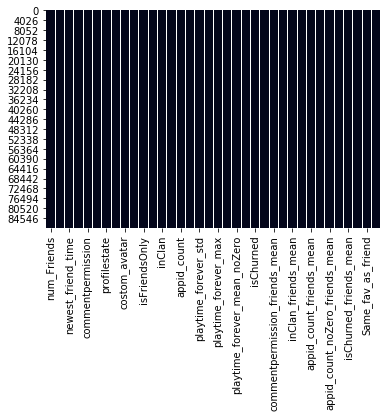

In [74]:
sns.heatmap(df_friends_temp.isnull(), cbar=False)

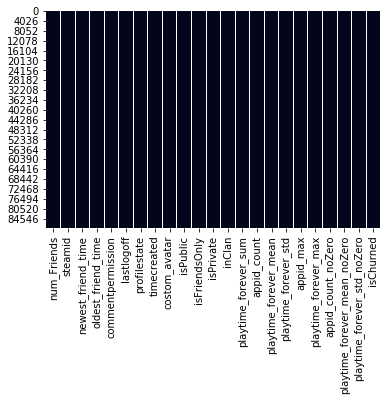

In [75]:
sns.heatmap(df_full_prof.isnull(), cbar=False)

20% from churned in test

20% from active in test

80% from chunred to train

same# from active to train (x2 if necessary)

scroe dist and ROC curve


In [76]:
df_full_prof = df_friends_temp

In [77]:
df_churned = df_full_prof[df_full_prof['isChurned'] == 1]

In [78]:
df_churned.nunique()

num_Friends                                    512
steamid                                      13833
newest_friend_time                           13476
oldest_friend_time                           11246
commentpermission                                3
lastlogoff                                   13777
profilestate                                     4
timecreated                                  13837
costom_avatar                                    2
isPublic                                         1
isFriendsOnly                                    1
isPrivate                                        1
inClan                                           1
playtime_forever_sum                           550
appid_count                                    324
playtime_forever_mean                          551
playtime_forever_std                           541
appid_max                                      144
playtime_forever_max                           549
appid_count_noZero             

In [79]:
df_active = df_full_prof[df_full_prof['isChurned'] == 0]

In [80]:
df_active.nunique()

num_Friends                                   1335
steamid                                      74538
newest_friend_time                           70915
oldest_friend_time                           60010
commentpermission                                3
lastlogoff                                   70009
profilestate                                     2
timecreated                                  74705
costom_avatar                                    2
isPublic                                         1
isFriendsOnly                                    1
isPrivate                                        1
inClan                                           1
playtime_forever_sum                         24098
appid_count                                   3683
playtime_forever_mean                        24515
playtime_forever_std                         24488
appid_max                                     1120
playtime_forever_max                         22865
appid_count_noZero             

In [81]:
from sklearn.model_selection import train_test_split
df_churned_train, df_churned_test = train_test_split(df_churned,test_size=0.2,random_state=1234)

In [82]:
len(df_churned_train)

11070

In [83]:
len(df_churned_test)

2768

In [84]:
df_active_remain, df_active_test = train_test_split(df_active,test_size=0.2,random_state=1234)

In [85]:
len(df_active_remain)

59773

In [86]:
len(df_active_test)

14944

In [87]:
df_active_extra, df_active_train = train_test_split(df_active_remain,test_size=len(df_churned_train),random_state=1234)

In [88]:
len(df_active_train)

11070

In [89]:
df_active_train.head()

,num_Friends,steamid,newest_friend_time,oldest_friend_time,commentpermission,lastlogoff,profilestate,timecreated,costom_avatar,isPublic,...,inClan_friends_mean,playtime_forever_sum_friends_mean,appid_count_friends_mean,playtime_forever_mean_friends_mean,appid_count_noZero_friends_mean,playtime_forever_mean_noZero_friends_mean,isChurned_friends_mean,friends_fav_appid,Same_fav_as_friend,num_Zero_games
14576,233.0,76561197993368028,1.550019e+09,0.000000e+00,1.0,1.560520e+09,1.0,1.192320e+09,1,1,...,1.0,1.768738e+05,779.581395,97.562109,387.395349,182.783749,0.000000,250900.0,0,443.0
47722,39.0,76561198069732080,1.513244e+09,1.442661e+09,1.0,1.559908e+09,1.0,1.345413e+09,1,1,...,1.0,2.808198e+05,1157.500000,138.614093,777.000000,205.456445,0.000000,730.0,0,26.0
58594,561.0,76561198107550282,1.552083e+09,1.384011e+09,1.0,1.560217e+09,1.0,1.379442e+09,1,1,...,1.0,6.053444e+05,743.272727,506.909246,347.181818,1076.238583,0.068182,730.0,1,7.0
80948,216.0,76561198332665040,1.544093e+09,1.474982e+09,1.0,1.560190e+09,1.0,1.474575e+09,1,1,...,1.0,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0,45.0
50662,15.0,76561198077719968,1.510844e+09,1.444150e+09,1.0,1.560295e+09,1.0,1.354832e+09,1,1,...,1.0,1.779852e+06,6478.750000,460.906984,2560.750000,1181.813916,0.000000,730.0,0,0.0


In [90]:
df_train = pd.concat([df_active_train,df_churned_train])

In [91]:
len(df_train)

22140

In [92]:
df_train.head()

,num_Friends,steamid,newest_friend_time,oldest_friend_time,commentpermission,lastlogoff,profilestate,timecreated,costom_avatar,isPublic,...,inClan_friends_mean,playtime_forever_sum_friends_mean,appid_count_friends_mean,playtime_forever_mean_friends_mean,appid_count_noZero_friends_mean,playtime_forever_mean_noZero_friends_mean,isChurned_friends_mean,friends_fav_appid,Same_fav_as_friend,num_Zero_games
14576,233.0,76561197993368028,1.550019e+09,0.000000e+00,1.0,1.560520e+09,1.0,1.192320e+09,1,1,...,1.0,1.768738e+05,779.581395,97.562109,387.395349,182.783749,0.000000,250900.0,0,443.0
47722,39.0,76561198069732080,1.513244e+09,1.442661e+09,1.0,1.559908e+09,1.0,1.345413e+09,1,1,...,1.0,2.808198e+05,1157.500000,138.614093,777.000000,205.456445,0.000000,730.0,0,26.0
58594,561.0,76561198107550282,1.552083e+09,1.384011e+09,1.0,1.560217e+09,1.0,1.379442e+09,1,1,...,1.0,6.053444e+05,743.272727,506.909246,347.181818,1076.238583,0.068182,730.0,1,7.0
80948,216.0,76561198332665040,1.544093e+09,1.474982e+09,1.0,1.560190e+09,1.0,1.474575e+09,1,1,...,1.0,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0,45.0
50662,15.0,76561198077719968,1.510844e+09,1.444150e+09,1.0,1.560295e+09,1.0,1.354832e+09,1,1,...,1.0,1.779852e+06,6478.750000,460.906984,2560.750000,1181.813916,0.000000,730.0,0,0.0


In [93]:
df_test = pd.concat([df_active_test,df_churned_test])

In [94]:
len(df_test)

17712

In [95]:
df_test.head()

,num_Friends,steamid,newest_friend_time,oldest_friend_time,commentpermission,lastlogoff,profilestate,timecreated,costom_avatar,isPublic,...,inClan_friends_mean,playtime_forever_sum_friends_mean,appid_count_friends_mean,playtime_forever_mean_friends_mean,appid_count_noZero_friends_mean,playtime_forever_mean_noZero_friends_mean,isChurned_friends_mean,friends_fav_appid,Same_fav_as_friend,num_Zero_games
1587,62.0,76561197961753618,1.510568e+09,0.000000e+00,0.0,1.560642e+09,1.0,1.065283e+09,1,1,...,1.0,127559.500000,648.500000,98.349653,337.000000,189.257418,0.000000,447020.0,0,0.0
33671,35.0,76561198035567415,1.552148e+09,1.360418e+09,0.0,1.560192e+09,1.0,1.293257e+09,1,1,...,1.0,150082.500000,561.666667,90.050959,382.500000,136.407490,0.000000,292030.0,0,331.0
46244,199.0,76561198066067121,1.552146e+09,1.342187e+09,1.0,1.558582e+09,1.0,1.340908e+09,1,1,...,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,1,0.0
27295,296.0,76561198019117260,1.549472e+09,1.263402e+09,1.0,1.560561e+09,1.0,1.262270e+09,1,1,...,1.0,221033.090909,560.636364,688.138411,280.136364,1227.642840,0.181818,730.0,0,775.0
70462,7.0,76561198170574355,1.452337e+09,1.445725e+09,1.0,1.560180e+09,1.0,1.419697e+09,1,1,...,1.0,582504.000000,956.000000,609.313808,650.000000,896.160000,0.000000,72200.0,0,0.0


In [96]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17712 entries, 1587 to 79733
Data columns (total 36 columns):
num_Friends                                  17712 non-null float64
steamid                                      17712 non-null int64
newest_friend_time                           17712 non-null float64
oldest_friend_time                           17712 non-null float64
commentpermission                            17712 non-null float64
lastlogoff                                   17712 non-null float64
profilestate                                 17712 non-null float64
timecreated                                  17712 non-null float64
costom_avatar                                17712 non-null int64
isPublic                                     17712 non-null int64
isFriendsOnly                                17712 non-null int64
isPrivate                                    17712 non-null int64
inClan                                       17712 non-null int64
playtime_forever

In [97]:
X_train = df_train.drop(['steamid','isPublic','isFriendsOnly','isPrivate','inClan','appid_count','playtime_forever_mean','lastlogoff','isChurned','appid_max','commentpermission_friends_mean','appid_count_friends_mean','friends_fav_appid','playtime_forever_mean_friends_mean','isChurned_friends_mean','inClan_friends_mean'],axis='columns')
X_test = df_test.drop(['steamid','isPublic','isFriendsOnly','isPrivate','inClan','appid_count','playtime_forever_mean','lastlogoff','isChurned','appid_max','commentpermission_friends_mean','appid_count_friends_mean','friends_fav_appid','playtime_forever_mean_friends_mean','isChurned_friends_mean','inClan_friends_mean'],axis='columns')
y_train = df_train['isChurned']
y_test = df_test['isChurned']

In [98]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22140 entries, 14576 to 68941
Data columns (total 20 columns):
num_Friends                                  22140 non-null float64
newest_friend_time                           22140 non-null float64
oldest_friend_time                           22140 non-null float64
commentpermission                            22140 non-null float64
profilestate                                 22140 non-null float64
timecreated                                  22140 non-null float64
costom_avatar                                22140 non-null int64
playtime_forever_sum                         22140 non-null float64
playtime_forever_std                         22140 non-null float64
playtime_forever_max                         22140 non-null float64
appid_count_noZero                           22140 non-null float64
playtime_forever_mean_noZero                 22140 non-null float64
playtime_forever_std_noZero                  22140 non-null float64
num_F

In [99]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [100]:
log_model = LogisticRegression(random_state=10,solver='lbfgs')
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

/anaconda2/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda2/lib/python3.6/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda2/lib/python3.6/site-packages/ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


In [101]:
#sns.pairplot(X_train)

In [102]:
#sns.pairplot(pd.DataFrame(X_train_scaled))

In [103]:
log_model.fit(X_train_scaled,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=10, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [1]:
from sklearn.metrics import confusion_matrix, classification_report
axis = plt.figure(figsize=(6,6))
log_pred = log_model.predict(X_test_scaled)
cm = confusion_matrix(y_test,log_pred)
ax = plt.subplot()
sns.heatmap(cm, annot=True, ax = ax,cmap='Blues',cbar=False)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix Test Set')
ax.xaxis.set_ticklabels(['Active', 'Churned'])
ax.yaxis.set_ticklabels(['Active', 'Chruned'])
print(cm)
print('\n')
print(classification_report(y_test,log_pred))

NameError: name 'plt' is not defined

In [2]:
prob_class_active = []
prob_class_churned = []
for x in log_model.predict_proba(X_test_scaled):
    prob_class_active.append(x[0])
    prob_class_churned.append(x[1])
df_test['Prob_Active_Log'] = prob_class_active
df_test['Prob_Churned_Log'] = prob_class_churned
#X_train.head()

NameError: name 'log_model' is not defined

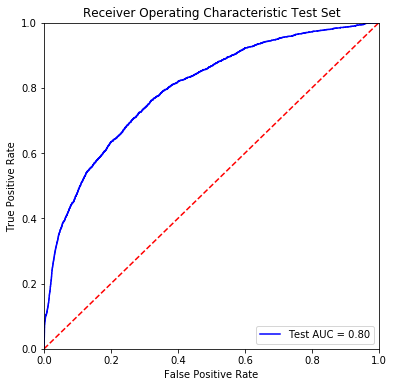

In [106]:
from sklearn import metrics
fpr, tpr, threshold = metrics.roc_curve(y_test, df_test['Prob_Churned_Log'], pos_label=1)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
axis = plt.figure(figsize=(6,6))
plt.title('Receiver Operating Characteristic Test Set')
plt.plot(fpr, tpr, 'b', label = 'Test AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

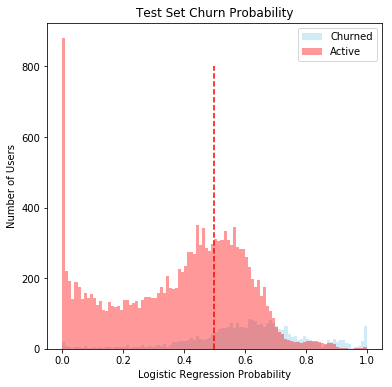

In [108]:
axis = plt.figure(figsize=(6,6))
sns.distplot( df_test['Prob_Churned_Log'][df_test['isChurned'] == 1] , color="skyblue", label="Churned",bins=100,kde=False)
sns.distplot( df_test['Prob_Churned_Log'][df_test['isChurned'] == 0] , color="red", label="Active",bins=100,kde=False)
plt.legend()
plt.plot([0.5, 0.5], [0, 800],'r--')
plt.ylabel("Number of Users")
plt.xlabel("Logistic Regression Probability")
plt.title("Test Set Churn Probability")
plt.show()

[[7295 3775]
 [2324 8746]]


              precision    recall  f1-score   support

           0       0.76      0.66      0.71     11070
           1       0.70      0.79      0.74     11070

   micro avg       0.72      0.72      0.72     22140
   macro avg       0.73      0.72      0.72     22140
weighted avg       0.73      0.72      0.72     22140



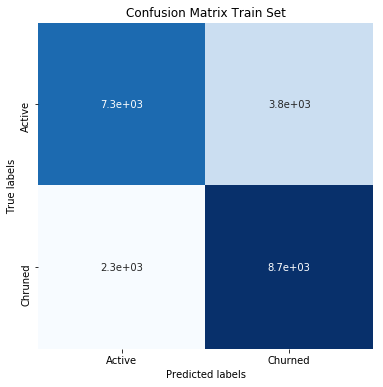

In [109]:
log_pred = log_model.predict(X_train_scaled)
axis = plt.figure(figsize=(6,6))
cm = confusion_matrix(y_train,log_pred)
ax = plt.subplot()
sns.heatmap(cm, annot=True, ax = ax,cmap='Blues',cbar=False)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix Train Set')
ax.xaxis.set_ticklabels(['Active', 'Churned'])
ax.yaxis.set_ticklabels(['Active', 'Chruned'])
print(cm)
print('\n')
print(classification_report(y_train,log_pred))

In [110]:
prob_class_active = []
prob_class_churned = []
for x in log_model.predict_proba(X_train_scaled):
    prob_class_active.append(x[0])
    prob_class_churned.append(x[1])
df_train['Prob_Active_Log'] = prob_class_active
df_train['Prob_Churned_Log'] = prob_class_churned
#X_train.head()

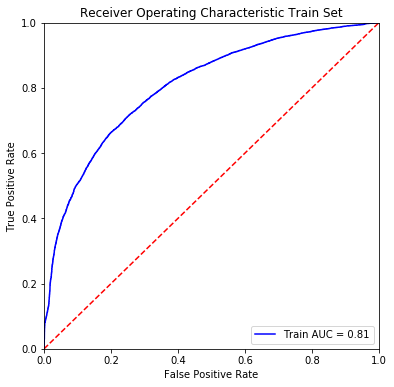

In [111]:
fpr, tpr, threshold = metrics.roc_curve(y_train, df_train['Prob_Churned_Log'], pos_label=1)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
axis = plt.figure(figsize=(6,6))
plt.title('Receiver Operating Characteristic Train Set')
plt.plot(fpr, tpr, 'b', label = 'Train AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

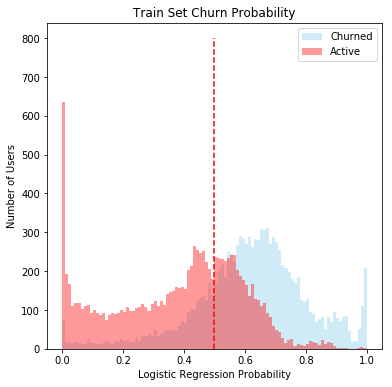

In [112]:
axis = plt.figure(figsize=(6,6))
sns.distplot( df_train['Prob_Churned_Log'][df_train['isChurned'] == 1] , color="skyblue", label="Churned",bins=100,kde=False)
sns.distplot( df_train['Prob_Churned_Log'][df_train['isChurned'] == 0] , color="red", label="Active",bins=100,kde=False)
plt.legend()
plt.plot([0.5, 0.5], [0, 800],'r--')
plt.ylabel("Number of Users")
plt.xlabel("Logistic Regression Probability")
plt.title("Train Set Churn Probability")
plt.show()

In [113]:
for i in range(0,len(log_model.coef_[0])):
    print([X_train.columns[i],abs(log_model.coef_[0][i])])

['num_Friends', 0.4816571694112387]
['newest_friend_time', 1.0729437261923047]
['oldest_friend_time', 0.16041750082308695]
['commentpermission', 0.05720677115032589]
['profilestate', 0.20911747889607307]
['timecreated', 0.027717481129342615]
['costom_avatar', 0.27316079649090297]
['playtime_forever_sum', 0.2943646777211425]
['playtime_forever_std', 0.07027244873678506]
['playtime_forever_max', 0.9958038070292844]
['appid_count_noZero', 1.0747266859422286]
['playtime_forever_mean_noZero', 0.1217148791278269]
['playtime_forever_std_noZero', 0.0448743764735227]
['num_Friends_friends_mean', 0.08058732359263483]
['costom_avatar_friends_mean', 1.188819814274212]
['playtime_forever_sum_friends_mean', 0.018848389345067187]
['appid_count_noZero_friends_mean', 0.016254987074883376]
['playtime_forever_mean_noZero_friends_mean', 0.0165191879640523]
['Same_fav_as_friend', 0.12012278135482751]
['num_Zero_games', 0.03951858814240962]


In [114]:
from sklearn.ensemble import RandomForestClassifier
rfc_model = RandomForestClassifier(n_estimators=200,criterion='entropy',max_depth=7)

In [115]:
rfc_model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=7, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

[[11852  3092]
 [  468  2300]]


              precision    recall  f1-score   support

           0       0.96      0.79      0.87     14944
           1       0.43      0.83      0.56      2768

   micro avg       0.80      0.80      0.80     17712
   macro avg       0.69      0.81      0.72     17712
weighted avg       0.88      0.80      0.82     17712



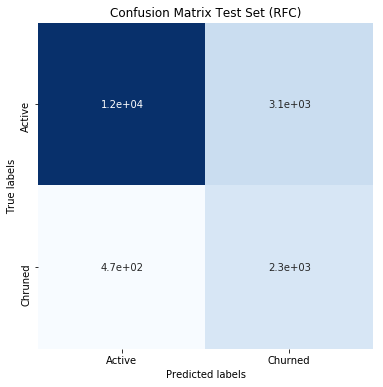

In [116]:
rfc_pred = rfc_model.predict(X_test)
cm = confusion_matrix(y_test,rfc_pred)
axis = plt.figure(figsize=(6,6))
ax = plt.subplot()
sns.heatmap(cm, annot=True, ax = ax,cmap='Blues',cbar=False)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix Test Set (RFC)')
ax.xaxis.set_ticklabels(['Active', 'Churned'])
ax.yaxis.set_ticklabels(['Active', 'Chruned'])
print(cm)
print('\n')
print(classification_report(y_test,rfc_pred))

In [117]:
prob_class_active = []
prob_class_churned = []
for x in rfc_model.predict_proba(X_test):
    prob_class_active.append(x[0])
    prob_class_churned.append(x[1])
df_test['Prob_Active_RFC'] = prob_class_active
df_test['Prob_Churned_RFC'] = prob_class_churned
#X_train.head()

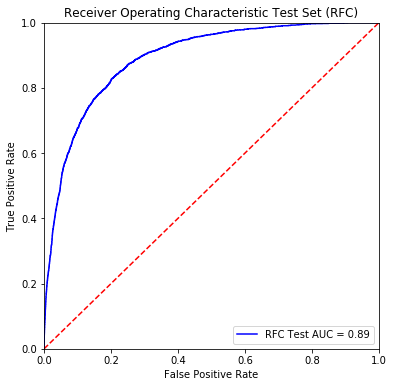

In [118]:
fpr, tpr, threshold = metrics.roc_curve(y_test, df_test['Prob_Churned_RFC'], pos_label=1)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
axis = plt.figure(figsize=(6,6))
plt.title('Receiver Operating Characteristic Test Set (RFC)')
plt.plot(fpr, tpr, 'b', label = 'RFC Test AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

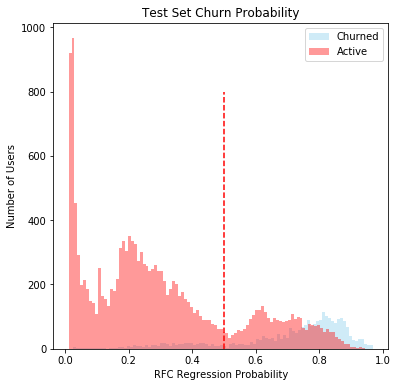

In [119]:
axis = plt.figure(figsize=(6,6))
sns.distplot( df_test['Prob_Churned_RFC'][df_test['isChurned'] == 1] , color="skyblue", label="Churned",bins=100,kde=False)
sns.distplot( df_test['Prob_Churned_RFC'][df_test['isChurned'] == 0] , color="red", label="Active",bins=100,kde=False)
plt.legend()
plt.plot([0.5, 0.5], [0, 800],'r--')
plt.ylabel("Number of Users")
plt.xlabel("RFC Regression Probability")
plt.title("Test Set Churn Probability")
plt.show()

[[8809 2261]
 [1767 9303]]


              precision    recall  f1-score   support

           0       0.83      0.80      0.81     11070
           1       0.80      0.84      0.82     11070

   micro avg       0.82      0.82      0.82     22140
   macro avg       0.82      0.82      0.82     22140
weighted avg       0.82      0.82      0.82     22140



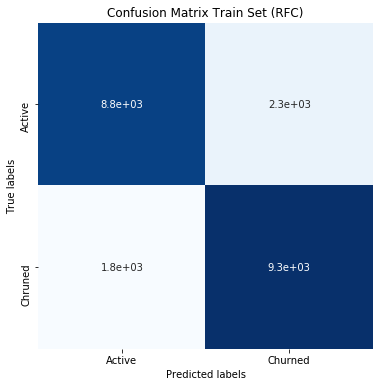

In [120]:
rfc_pred = rfc_model.predict(X_train)
cm = confusion_matrix(y_train,rfc_pred)
axis = plt.figure(figsize=(6,6))
ax = plt.subplot()
sns.heatmap(cm, annot=True, ax = ax,cmap='Blues',cbar=False)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix Train Set (RFC)')
ax.xaxis.set_ticklabels(['Active', 'Churned'])
ax.yaxis.set_ticklabels(['Active', 'Chruned'])
print(cm)
print('\n')
print(classification_report(y_train,rfc_pred))

In [121]:
prob_class_active = []
prob_class_churned = []
for x in rfc_model.predict_proba(X_train):
    prob_class_active.append(x[0])
    prob_class_churned.append(x[1])
df_train['Prob_Active_RFC'] = prob_class_active
df_train['Prob_Churned_RFC'] = prob_class_churned
#X_train.head()

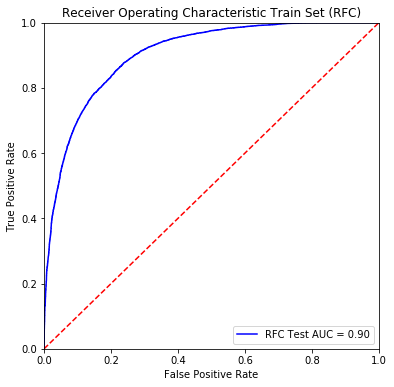

In [122]:
fpr, tpr, threshold = metrics.roc_curve(y_train, df_train['Prob_Churned_RFC'], pos_label=1)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
axis = plt.figure(figsize=(6,6))
plt.title('Receiver Operating Characteristic Train Set (RFC)')
plt.plot(fpr, tpr, 'b', label = 'RFC Test AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

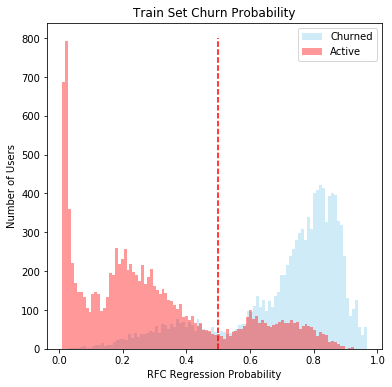

In [123]:
axis = plt.figure(figsize=(6,6))
sns.distplot( df_train['Prob_Churned_RFC'][df_train['isChurned'] == 1] , color="skyblue", label="Churned",bins=100,kde=False)
sns.distplot( df_train['Prob_Churned_RFC'][df_train['isChurned'] == 0] , color="red", label="Active",bins=100,kde=False)
plt.legend()
plt.plot([0.5, 0.5], [0, 800],'r--')
plt.ylabel("Number of Users")
plt.xlabel("RFC Regression Probability")
plt.title("Train Set Churn Probability")
plt.show()

In [124]:
rfc_model.feature_importances_

array([0.07400314, 0.47967272, 0.02017503, 0.00441464, 0.00388091,
       0.01974414, 0.01253069, 0.0806309 , 0.0248446 , 0.0507699 ,
       0.05570862, 0.01922469, 0.043363  , 0.02834874, 0.01901222,
       0.00861572, 0.00816203, 0.00908354, 0.00275836, 0.0350564 ])

In [125]:
features = []
for i in range(0,len(rfc_model.feature_importances_)):
    if rfc_model.feature_importances_[i] > 0.01:
        print([X_train.columns[i],rfc_model.feature_importances_[i]])
        features.append(X_train.columns[i])
print(features)

['num_Friends', 0.0740031436061789]
['newest_friend_time', 0.47967271962179964]
['oldest_friend_time', 0.020175028989222077]
['timecreated', 0.019744140028309317]
['costom_avatar', 0.012530694468834681]
['playtime_forever_sum', 0.08063089973202281]
['playtime_forever_std', 0.02484459882734094]
['playtime_forever_max', 0.0507699017775046]
['appid_count_noZero', 0.055708618754326526]
['playtime_forever_mean_noZero', 0.01922468808059518]
['playtime_forever_std_noZero', 0.04336299741890852]
['num_Friends_friends_mean', 0.028348741060615305]
['costom_avatar_friends_mean', 0.019012222340068167]
['num_Zero_games', 0.03505640097434663]
['num_Friends', 'newest_friend_time', 'oldest_friend_time', 'timecreated', 'costom_avatar', 'playtime_forever_sum', 'playtime_forever_std', 'playtime_forever_max', 'appid_count_noZero', 'playtime_forever_mean_noZero', 'playtime_forever_std_noZero', 'num_Friends_friends_mean', 'costom_avatar_friends_mean', 'num_Zero_games']


In [126]:
X_train = df_train[features]
X_test = df_test[features]
y_train = df_train['isChurned']
y_test = df_test['isChurned']
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

/anaconda2/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda2/lib/python3.6/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda2/lib/python3.6/site-packages/ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


In [127]:
log_model.fit(X_train_scaled,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=10, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

[[9434 5510]
 [ 570 2198]]


              precision    recall  f1-score   support

           0       0.94      0.63      0.76     14944
           1       0.29      0.79      0.42      2768

   micro avg       0.66      0.66      0.66     17712
   macro avg       0.61      0.71      0.59     17712
weighted avg       0.84      0.66      0.70     17712



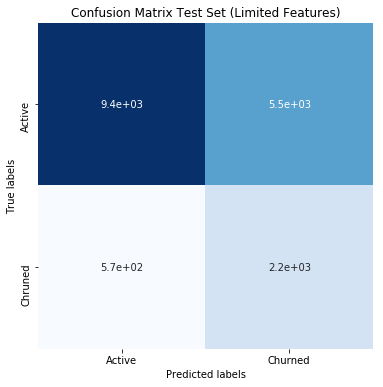

In [128]:
from sklearn.metrics import confusion_matrix, classification_report
log_pred = log_model.predict(X_test_scaled)
cm = confusion_matrix(y_test,log_pred)
axis = plt.figure(figsize=(6,6))
ax = plt.subplot()
sns.heatmap(cm, annot=True, ax = ax,cmap='Blues',cbar=False)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix Test Set (Limited Features)')
ax.xaxis.set_ticklabels(['Active', 'Churned'])
ax.yaxis.set_ticklabels(['Active', 'Chruned'])
print(cm)
print('\n')
print(classification_report(y_test,log_pred))

In [129]:
prob_class_active = []
prob_class_churned = []
for x in log_model.predict_proba(X_test_scaled):
    prob_class_active.append(x[0])
    prob_class_churned.append(x[1])
df_test['Prob_Active_Log_Limited'] = prob_class_active
df_test['Prob_Churned_Log_Limited'] = prob_class_churned
#X_train.head()

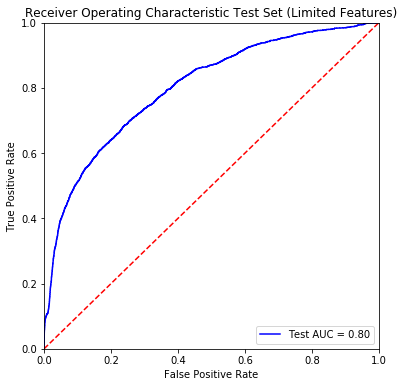

In [130]:
from sklearn import metrics
fpr, tpr, threshold = metrics.roc_curve(y_test, df_test['Prob_Churned_Log_Limited'], pos_label=1)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
axis = plt.figure(figsize=(6,6))
plt.title('Receiver Operating Characteristic Test Set (Limited Features)')
plt.plot(fpr, tpr, 'b', label = 'Test AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

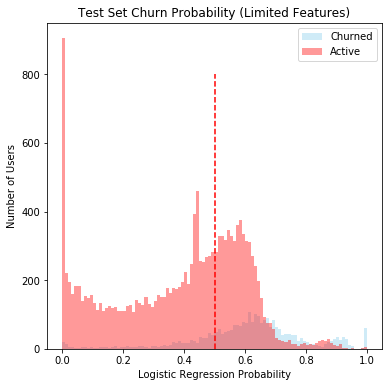

In [131]:
axis = plt.figure(figsize=(6,6))
sns.distplot( df_test['Prob_Churned_Log_Limited'][df_test['isChurned'] == 1] , color="skyblue", label="Churned",bins=100,kde=False)
sns.distplot( df_test['Prob_Churned_Log_Limited'][df_test['isChurned'] == 0] , color="red", label="Active",bins=100,kde=False)
plt.legend()
plt.plot([0.5, 0.5], [0, 800],'r--')
plt.ylabel("Number of Users")
plt.xlabel("Logistic Regression Probability")
plt.title("Test Set Churn Probability (Limited Features)")
plt.show()

[[7156 3914]
 [2213 8857]]


              precision    recall  f1-score   support

           0       0.76      0.65      0.70     11070
           1       0.69      0.80      0.74     11070

   micro avg       0.72      0.72      0.72     22140
   macro avg       0.73      0.72      0.72     22140
weighted avg       0.73      0.72      0.72     22140



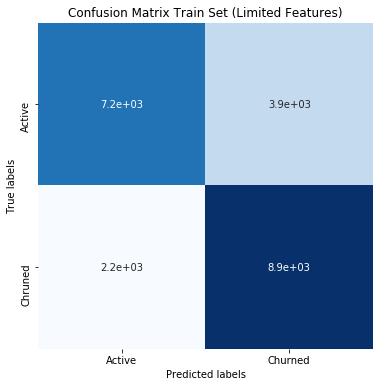

In [132]:
log_pred = log_model.predict(X_train_scaled)
cm = confusion_matrix(y_train,log_pred)
axis = plt.figure(figsize=(6,6))
ax = plt.subplot()
sns.heatmap(cm, annot=True, ax = ax,cmap='Blues',cbar=False)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix Train Set (Limited Features)')
ax.xaxis.set_ticklabels(['Active', 'Churned'])
ax.yaxis.set_ticklabels(['Active', 'Chruned'])
print(cm)
print('\n')
print(classification_report(y_train,log_pred))

In [133]:
prob_class_active = []
prob_class_churned = []
for x in log_model.predict_proba(X_train_scaled):
    prob_class_active.append(x[0])
    prob_class_churned.append(x[1])
df_train['Prob_Active_Log_Limited'] = prob_class_active
df_train['Prob_Churned_Log_Limited'] = prob_class_churned

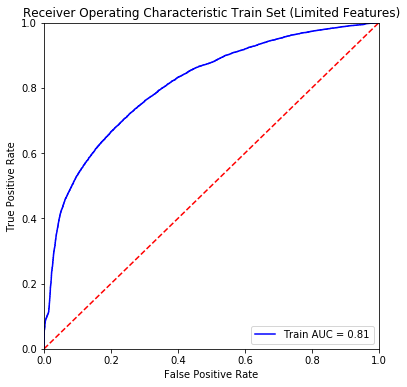

In [134]:
fpr, tpr, threshold = metrics.roc_curve(y_train, df_train['Prob_Churned_Log_Limited'], pos_label=1)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
axis = plt.figure(figsize=(6,6))
plt.title('Receiver Operating Characteristic Train Set (Limited Features)')
plt.plot(fpr, tpr, 'b', label = 'Train AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

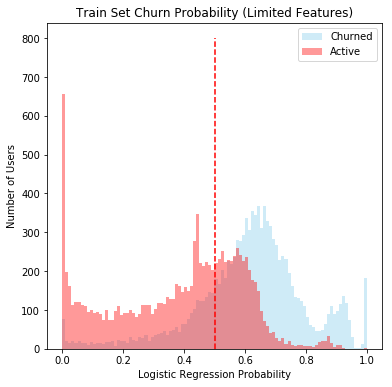

In [135]:
axis = plt.figure(figsize=(6,6))
sns.distplot( df_train['Prob_Churned_Log_Limited'][df_train['isChurned'] == 1] , color="skyblue", label="Churned",bins=100,kde=False)
sns.distplot( df_train['Prob_Churned_Log_Limited'][df_train['isChurned'] == 0] , color="red", label="Active",bins=100,kde=False)
plt.legend()
plt.plot([0.5, 0.5], [0, 800],'r--')
plt.ylabel("Number of Users")
plt.xlabel("Logistic Regression Probability")
plt.title("Train Set Churn Probability (Limited Features)")
plt.show()

In [136]:
for i in range(0,len(log_model.coef_[0])):
    print([df_train[features].columns[i],log_model.coef_[0][i]])

['num_Friends', -0.528537171932519]
['newest_friend_time', -1.1028751431827786]
['oldest_friend_time', 0.1541018012519637]
['timecreated', 0.021235907237930826]
['costom_avatar', -0.3217146782647476]
['playtime_forever_sum', 0.2925798243420289]
['playtime_forever_std', -0.08567380424370756]
['playtime_forever_max', -0.964881591676062]
['appid_count_noZero', -1.1259456954269305]
['playtime_forever_mean_noZero', 0.12153107372033906]
['playtime_forever_std_noZero', 0.05135690939904728]
['num_Friends_friends_mean', -0.12506178810733146]
['costom_avatar_friends_mean', 1.2063010158012732]
['num_Zero_games', 0.03396534290391996]


In [137]:
rfc_model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=7, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

[[11912  3032]
 [  487  2281]]


              precision    recall  f1-score   support

           0       0.96      0.80      0.87     14944
           1       0.43      0.82      0.56      2768

   micro avg       0.80      0.80      0.80     17712
   macro avg       0.70      0.81      0.72     17712
weighted avg       0.88      0.80      0.82     17712



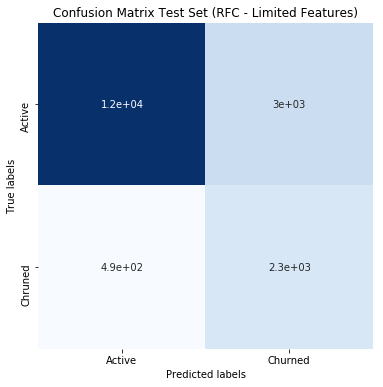

In [138]:
rfc_pred = rfc_model.predict(X_test)
cm = confusion_matrix(y_test,rfc_pred)
axis = plt.figure(figsize=(6,6))
ax = plt.subplot()
sns.heatmap(cm, annot=True, ax = ax,cmap='Blues',cbar=False)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix Test Set (RFC - Limited Features)')
ax.xaxis.set_ticklabels(['Active', 'Churned'])
ax.yaxis.set_ticklabels(['Active', 'Chruned'])
print(cm)
print('\n')
print(classification_report(y_test,rfc_pred))

In [139]:
prob_class_active = []
prob_class_churned = []
for x in rfc_model.predict_proba(X_test):
    prob_class_active.append(x[0])
    prob_class_churned.append(x[1])
df_test['Prob_Active_RFC_Limited'] = prob_class_active
df_test['Prob_Churned_RFC_Limited'] = prob_class_churned
#X_train.head()

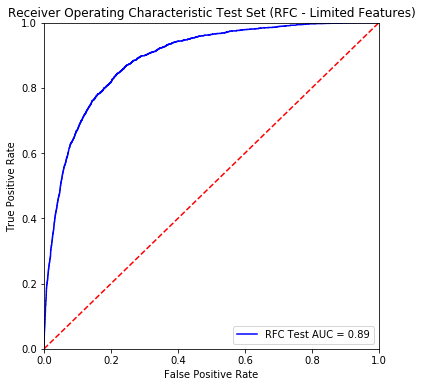

In [140]:
fpr, tpr, threshold = metrics.roc_curve(y_test, df_test['Prob_Churned_RFC_Limited'], pos_label=1)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
axis = plt.figure(figsize=(6,6))
plt.title('Receiver Operating Characteristic Test Set (RFC - Limited Features)')
plt.plot(fpr, tpr, 'b', label = 'RFC Test AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

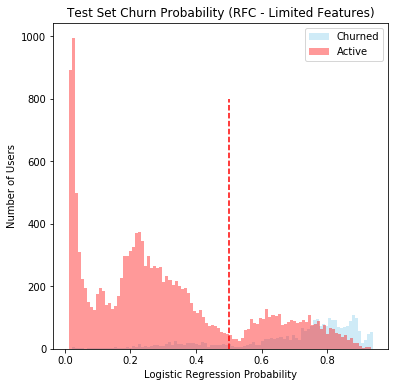

In [142]:
axis = plt.figure(figsize=(6,6))
sns.distplot( df_test['Prob_Churned_RFC_Limited'][df_test['isChurned'] == 1] , color="skyblue", label="Churned",bins=100,kde=False)
sns.distplot( df_test['Prob_Churned_RFC_Limited'][df_test['isChurned'] == 0] , color="red", label="Active",bins=100,kde=False)
plt.legend()
plt.plot([0.5, 0.5], [0, 800],'r--')
plt.ylabel("Number of Users")
plt.xlabel("Logistic Regression Probability")
plt.title("Test Set Churn Probability (RFC - Limited Features)")
plt.show()

[[8863 2207]
 [1844 9226]]


              precision    recall  f1-score   support

           0       0.83      0.80      0.81     11070
           1       0.81      0.83      0.82     11070

   micro avg       0.82      0.82      0.82     22140
   macro avg       0.82      0.82      0.82     22140
weighted avg       0.82      0.82      0.82     22140



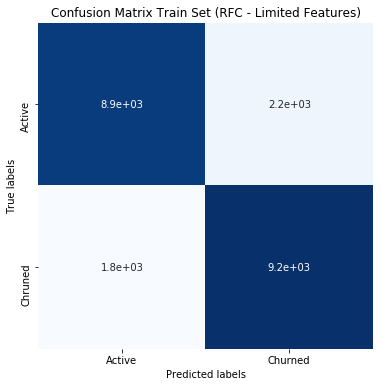

In [143]:
rfc_pred = rfc_model.predict(X_train)
cm = confusion_matrix(y_train,rfc_pred)
axis = plt.figure(figsize=(6,6))
ax = plt.subplot()
sns.heatmap(cm, annot=True, ax = ax,cmap='Blues',cbar=False)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix Train Set (RFC - Limited Features)')
ax.xaxis.set_ticklabels(['Active', 'Churned'])
ax.yaxis.set_ticklabels(['Active', 'Chruned'])
print(cm)
print('\n')
print(classification_report(y_train,rfc_pred))

In [144]:
prob_class_active = []
prob_class_churned = []
for x in rfc_model.predict_proba(X_train):
    prob_class_active.append(x[0])
    prob_class_churned.append(x[1])
df_train['Prob_Active_RFC_Limited'] = prob_class_active
df_train['Prob_Churned_RFC_Limited'] = prob_class_churned
#X_train.head()

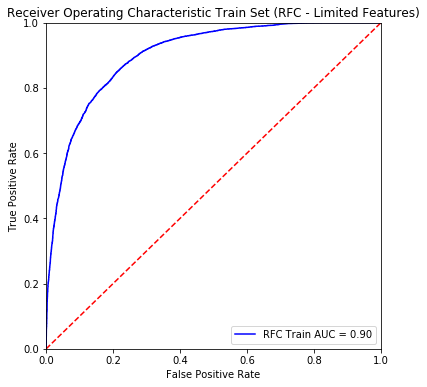

In [145]:
fpr, tpr, threshold = metrics.roc_curve(y_train, df_train['Prob_Churned_RFC_Limited'], pos_label=1)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
axis = plt.figure(figsize=(6,6))
plt.title('Receiver Operating Characteristic Train Set (RFC - Limited Features)')
plt.plot(fpr, tpr, 'b', label = 'RFC Train AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

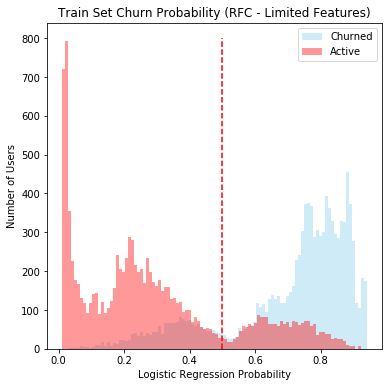

In [146]:
axis = plt.figure(figsize=(6,6))
sns.distplot( df_train['Prob_Churned_RFC_Limited'][df_train['isChurned'] == 1] , color="skyblue", label="Churned",bins=100,kde=False)
sns.distplot( df_train['Prob_Churned_RFC_Limited'][df_train['isChurned'] == 0] , color="red", label="Active",bins=100,kde=False)
plt.legend()
plt.plot([0.5, 0.5], [0, 800],'r--')
plt.ylabel("Number of Users")
plt.xlabel("Logistic Regression Probability")
plt.title("Train Set Churn Probability (RFC - Limited Features)")
plt.show()

In [147]:
rfc_model.feature_importances_

array([0.08059821, 0.49143569, 0.01975524, 0.02147597, 0.01491683,
       0.07558679, 0.03063994, 0.0316556 , 0.0578686 , 0.04109148,
       0.04017203, 0.0289463 , 0.02145593, 0.0444014 ])

In [148]:
features = []
for i in range(0,len(rfc_model.feature_importances_)):
    if rfc_model.feature_importances_[i] > 0.01:
        print([X_train.columns[i],rfc_model.feature_importances_[i]])
        features.append(X_train.columns[i])
print(features)

['num_Friends', 0.08059820718006067]
['newest_friend_time', 0.4914356850833865]
['oldest_friend_time', 0.019755235762893456]
['timecreated', 0.021475967189130904]
['costom_avatar', 0.01491683124445449]
['playtime_forever_sum', 0.07558679483120663]
['playtime_forever_std', 0.03063993572346084]
['playtime_forever_max', 0.03165560060107508]
['appid_count_noZero', 0.057868603085184496]
['playtime_forever_mean_noZero', 0.041091480067686204]
['playtime_forever_std_noZero', 0.04017203135952064]
['num_Friends_friends_mean', 0.028946299188473818]
['costom_avatar_friends_mean', 0.021455933010878843]
['num_Zero_games', 0.0444013956725875]
['num_Friends', 'newest_friend_time', 'oldest_friend_time', 'timecreated', 'costom_avatar', 'playtime_forever_sum', 'playtime_forever_std', 'playtime_forever_max', 'appid_count_noZero', 'playtime_forever_mean_noZero', 'playtime_forever_std_noZero', 'num_Friends_friends_mean', 'costom_avatar_friends_mean', 'num_Zero_games']


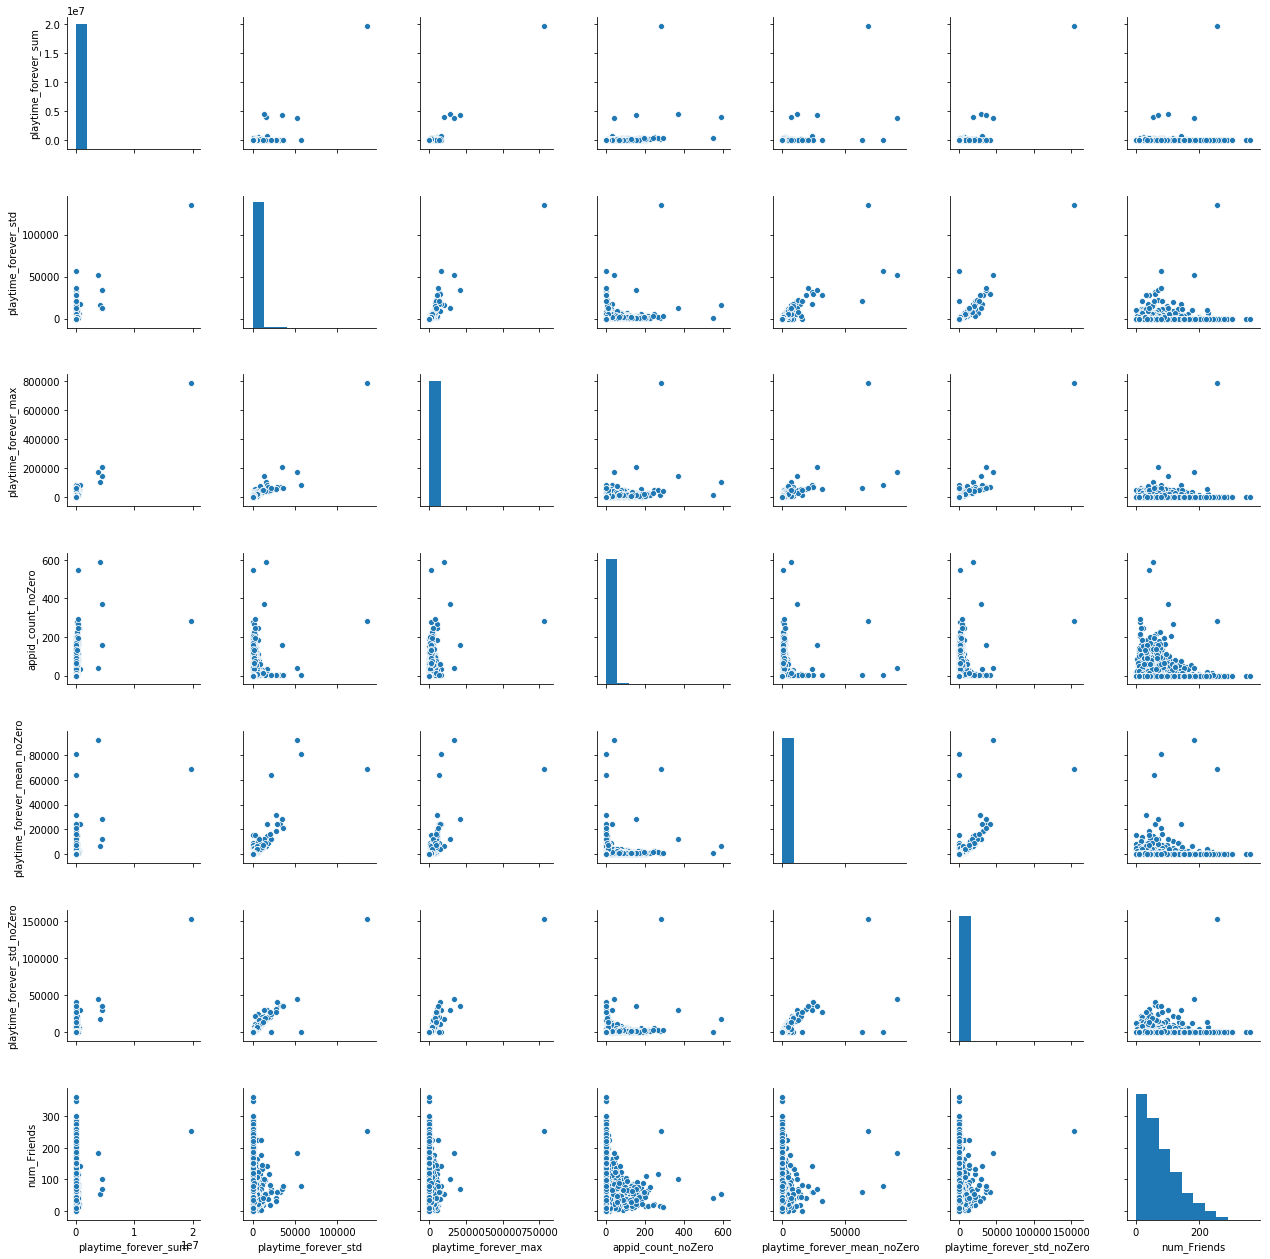

In [165]:
sns.pairplot(df_test[(df_test['Prob_Churned_Log'] > 0.4) & (df_test['isChurned'] == 0)][['playtime_forever_sum','playtime_forever_std','playtime_forever_max','appid_count_noZero','playtime_forever_mean_noZero','playtime_forever_std_noZero','num_Friends']])

In [164]:
df_test.playtime_forever_sum.describe()

count    1.771200e+04
mean     1.176491e+05
std      6.633414e+05
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      7.379525e+04
max      5.319476e+07
Name: playtime_forever_sum, dtype: float64

In [270]:
df_churned_no_info = df_churned[df_churned['playtime_forever_sum'] == 0]
df_churned_have_info = df_churned[df_churned['playtime_forever_sum'] != 0]
print(len(df_churned_no_info))
print(len(df_churned_have_info))

13288
550


In [271]:
df_active_no_info = df_active[df_active['playtime_forever_sum'] == 0]
df_active_have_info = df_active[df_active['playtime_forever_sum'] != 0]
print(len(df_active_no_info))
print(len(df_active_have_info))

50189
24528


In [272]:
df_churned_train_no_info, df_churned_test_no_info = train_test_split(df_churned_no_info,test_size=0.2,random_state=1234)
df_churned_train_have_info, df_churned_test_have_info = train_test_split(df_churned_have_info,test_size=0.2,random_state=1234)


In [273]:
print(len(df_churned_train_no_info))
print(len(df_churned_train_have_info))

10630
440


In [274]:
print(len(df_churned_test_no_info))
print(len(df_churned_test_have_info))

2658
110


In [275]:
df_active_remain_no_info, df_active_test_no_info = train_test_split(df_active_no_info,test_size=0.2,random_state=1234)
df_active_remain_have_info, df_active_test_have_info = train_test_split(df_active_have_info,test_size=0.2,random_state=1234)

In [276]:
print(len(df_active_remain_no_info))
print(len(df_active_remain_have_info))

40151
19622


In [277]:
print(len(df_active_test_no_info))
print(len(df_active_test_have_info))

10038
4906


In [278]:
df_active_extra_no_info, df_active_train_no_info = train_test_split(df_active_remain_no_info,test_size=len(df_churned_train_no_info),random_state=1234)
df_active_extra_have_info, df_active_train_have_info = train_test_split(df_active_remain_have_info,test_size=len(df_churned_train_have_info),random_state=1234)


In [279]:
print(len(df_active_train_no_info))
print(len(df_active_train_have_info))

10630
440


In [280]:
df_active_train_no_info.mean()

num_Friends                                  1.265806e+02
steamid                                      7.656120e+16
newest_friend_time                           1.470737e+09
oldest_friend_time                           1.063998e+09
commentpermission                            4.762935e-01
lastlogoff                                   1.559799e+09
profilestate                                 9.979304e-01
timecreated                                  1.299211e+09
costom_avatar                                9.689558e-01
isPublic                                     1.000000e+00
isFriendsOnly                                0.000000e+00
isPrivate                                    0.000000e+00
inClan                                       1.000000e+00
playtime_forever_sum                         0.000000e+00
appid_count                                  0.000000e+00
playtime_forever_mean                        0.000000e+00
playtime_forever_std                         0.000000e+00
appid_max     

In [281]:
df_active_train_have_info.mean()

num_Friends                                  1.854477e+02
steamid                                      7.656120e+16
newest_friend_time                           1.468041e+09
oldest_friend_time                           1.200055e+09
commentpermission                            7.863636e-01
lastlogoff                                   1.560266e+09
profilestate                                 1.000000e+00
timecreated                                  1.337503e+09
costom_avatar                                9.954545e-01
isPublic                                     1.000000e+00
isFriendsOnly                                0.000000e+00
isPrivate                                    0.000000e+00
inClan                                       1.000000e+00
playtime_forever_sum                         3.548515e+05
appid_count                                  7.327045e+02
playtime_forever_mean                        1.739190e+03
playtime_forever_std                         7.259068e+03
appid_max     

In [282]:
df_train_no_info = pd.concat([df_active_train_no_info,df_churned_train_no_info])
df_train_have_info = pd.concat([df_active_train_have_info,df_churned_train_have_info])

In [283]:
print(len(df_train_no_info))
print(len(df_train_have_info))

21260
880


In [284]:
df_train_have_info.mean()

num_Friends                                  1.645375e+02
steamid                                      7.656120e+16
newest_friend_time                           1.484319e+09
oldest_friend_time                           1.247711e+09
commentpermission                            7.965909e-01
lastlogoff                                   1.551381e+09
profilestate                                 1.000000e+00
timecreated                                  1.344168e+09
costom_avatar                                9.886364e-01
isPublic                                     1.000000e+00
isFriendsOnly                                0.000000e+00
isPrivate                                    0.000000e+00
inClan                                       1.000000e+00
playtime_forever_sum                         3.157289e+05
appid_count                                  6.072955e+02
playtime_forever_mean                        2.230552e+03
playtime_forever_std                         7.780931e+03
appid_max     

In [285]:
df_test_no_info = pd.concat([df_active_test_no_info,df_churned_test_no_info])
df_test_have_info = pd.concat([df_active_test_have_info,df_churned_test_have_info])

In [286]:
print(len(df_test_no_info))
print(len(df_test_have_info))

12696
5016


In [287]:
df_test_no_info.mean()

num_Friends                                  1.142866e+02
steamid                                      7.656120e+16
newest_friend_time                           1.459729e+09
oldest_friend_time                           1.072169e+09
commentpermission                            4.506144e-01
lastlogoff                                   1.543656e+09
profilestate                                 9.930687e-01
timecreated                                  1.301148e+09
costom_avatar                                9.527410e-01
isPublic                                     1.000000e+00
isFriendsOnly                                0.000000e+00
isPrivate                                    0.000000e+00
inClan                                       1.000000e+00
playtime_forever_sum                         0.000000e+00
appid_count                                  0.000000e+00
playtime_forever_mean                        0.000000e+00
playtime_forever_std                         0.000000e+00
appid_max     

In [288]:
df_test_have_info.mean()

num_Friends                                  1.994466e+02
steamid                                      7.656120e+16
newest_friend_time                           1.483118e+09
oldest_friend_time                           1.219341e+09
commentpermission                            7.492026e-01
lastlogoff                                   1.559862e+09
profilestate                                 1.000000e+00
timecreated                                  1.335837e+09
costom_avatar                                9.944179e-01
isPublic                                     1.000000e+00
isFriendsOnly                                0.000000e+00
isPrivate                                    0.000000e+00
inClan                                       1.000000e+00
playtime_forever_sum                         4.091451e+05
appid_count                                  8.100287e+02
playtime_forever_mean                        1.901843e+03
playtime_forever_std                         8.040422e+03
appid_max     

In [289]:
X_train_have = df_train_have_info.drop(['steamid','isPublic','isFriendsOnly','isPrivate','inClan','appid_count','playtime_forever_mean','lastlogoff','isChurned','appid_max','commentpermission_friends_mean','appid_count_friends_mean','friends_fav_appid','playtime_forever_mean_friends_mean','isChurned_friends_mean','inClan_friends_mean'],axis='columns')
X_test_have = df_test_have_info.drop(['steamid','isPublic','isFriendsOnly','isPrivate','inClan','appid_count','playtime_forever_mean','lastlogoff','isChurned','appid_max','commentpermission_friends_mean','appid_count_friends_mean','friends_fav_appid','playtime_forever_mean_friends_mean','isChurned_friends_mean','inClan_friends_mean'],axis='columns')
y_train_have = df_train_have_info['isChurned']
y_test_have = df_test_have_info['isChurned']

In [290]:
X_train_have.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 880 entries, 39136 to 61585
Data columns (total 20 columns):
num_Friends                                  880 non-null float64
newest_friend_time                           880 non-null float64
oldest_friend_time                           880 non-null float64
commentpermission                            880 non-null float64
profilestate                                 880 non-null float64
timecreated                                  880 non-null float64
costom_avatar                                880 non-null int64
playtime_forever_sum                         880 non-null float64
playtime_forever_std                         880 non-null float64
playtime_forever_max                         880 non-null float64
appid_count_noZero                           880 non-null float64
playtime_forever_mean_noZero                 880 non-null float64
playtime_forever_std_noZero                  880 non-null float64
num_Friends_friends_mean         

In [291]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [292]:
log_model = LogisticRegression(random_state=10,solver='lbfgs')
scaler = StandardScaler()
X_train_have_scaled = scaler.fit_transform(X_train_have)
X_test_have_scaled = scaler.transform(X_test_have)

/anaconda2/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda2/lib/python3.6/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda2/lib/python3.6/site-packages/ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


In [293]:
#sns.pairplot(X_train)

In [294]:
#sns.pairplot(pd.DataFrame(X_train_scaled))

In [295]:
log_model.fit(X_train_have_scaled,y_train_have)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=10, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

[[2838 2068]
 [  29   81]]


              precision    recall  f1-score   support

           0       0.99      0.58      0.73      4906
           1       0.04      0.74      0.07       110

   micro avg       0.58      0.58      0.58      5016
   macro avg       0.51      0.66      0.40      5016
weighted avg       0.97      0.58      0.72      5016



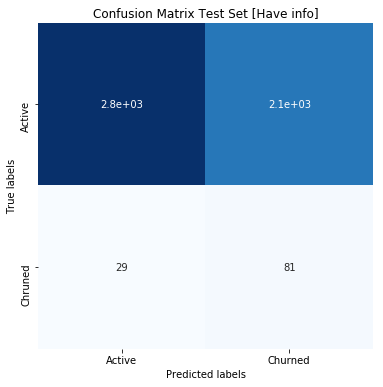

In [296]:
from sklearn.metrics import confusion_matrix, classification_report
axis = plt.figure(figsize=(6,6))
log_pred = log_model.predict(X_test_have_scaled)
cm = confusion_matrix(y_test_have,log_pred)
ax = plt.subplot()
sns.heatmap(cm, annot=True, ax = ax,cmap='Blues',cbar=False)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix Test Set [Have info]')
ax.xaxis.set_ticklabels(['Active', 'Churned'])
ax.yaxis.set_ticklabels(['Active', 'Chruned'])
print(cm)
print('\n')
print(classification_report(y_test_have,log_pred))

In [297]:
prob_class_active = []
prob_class_churned = []
for x in log_model.predict_proba(X_test_have_scaled):
    prob_class_active.append(x[0])
    prob_class_churned.append(x[1])
df_test_have_info['Prob_Active_Log'] = prob_class_active
df_test_have_info['Prob_Churned_Log'] = prob_class_churned
#X_train.head()

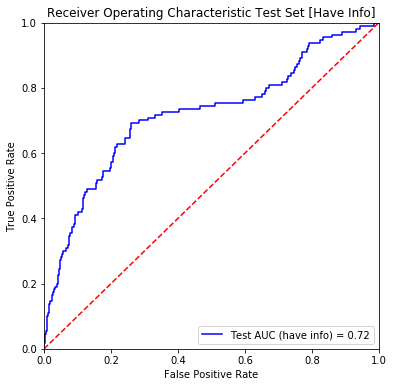

In [298]:
from sklearn import metrics
fpr, tpr, threshold = metrics.roc_curve(y_test_have, df_test_have_info['Prob_Churned_Log'], pos_label=1)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
axis = plt.figure(figsize=(6,6))
plt.title('Receiver Operating Characteristic Test Set [Have Info]')
plt.plot(fpr, tpr, 'b', label = 'Test AUC (have info) = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

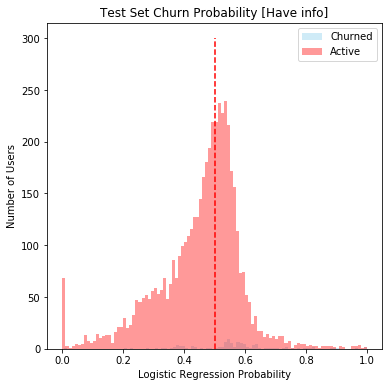

In [299]:
axis = plt.figure(figsize=(6,6))
sns.distplot( df_test_have_info['Prob_Churned_Log'][df_test_have_info['isChurned'] == 1] , color="skyblue", label="Churned",bins=100,kde=False)
sns.distplot( df_test_have_info['Prob_Churned_Log'][df_test_have_info['isChurned'] == 0] , color="red", label="Active",bins=100,kde=False)
plt.legend()
plt.plot([0.5, 0.5], [0, 300],'r--')
plt.ylabel("Number of Users")
plt.xlabel("Logistic Regression Probability")
plt.title("Test Set Churn Probability [Have info]")
plt.show()

[[248 192]
 [127 313]]


              precision    recall  f1-score   support

           0       0.66      0.56      0.61       440
           1       0.62      0.71      0.66       440

   micro avg       0.64      0.64      0.64       880
   macro avg       0.64      0.64      0.64       880
weighted avg       0.64      0.64      0.64       880



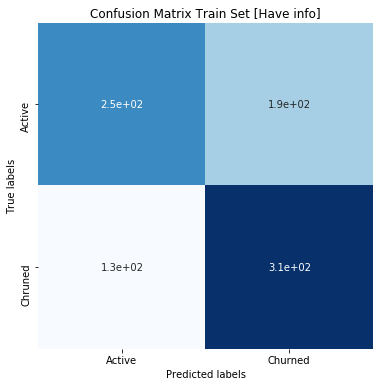

In [300]:
log_pred = log_model.predict(X_train_have_scaled)
axis = plt.figure(figsize=(6,6))
cm = confusion_matrix(y_train_have,log_pred)
ax = plt.subplot()
sns.heatmap(cm, annot=True, ax = ax,cmap='Blues',cbar=False)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix Train Set [Have info]')
ax.xaxis.set_ticklabels(['Active', 'Churned'])
ax.yaxis.set_ticklabels(['Active', 'Chruned'])
print(cm)
print('\n')
print(classification_report(y_train_have,log_pred))

In [301]:
prob_class_active = []
prob_class_churned = []
for x in log_model.predict_proba(X_train_have_scaled):
    prob_class_active.append(x[0])
    prob_class_churned.append(x[1])
df_train_have_info['Prob_Active_Log'] = prob_class_active
df_train_have_info['Prob_Churned_Log'] = prob_class_churned
#X_train.head()

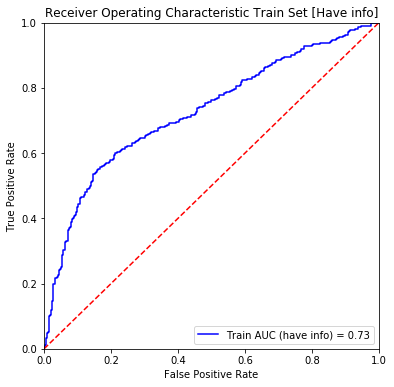

In [302]:
fpr, tpr, threshold = metrics.roc_curve(y_train_have, df_train_have_info['Prob_Churned_Log'], pos_label=1)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
axis = plt.figure(figsize=(6,6))
plt.title('Receiver Operating Characteristic Train Set [Have info]')
plt.plot(fpr, tpr, 'b', label = 'Train AUC (have info) = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

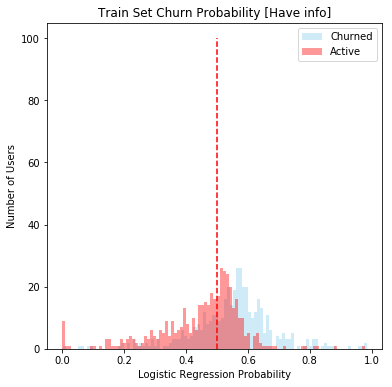

In [303]:
axis = plt.figure(figsize=(6,6))
sns.distplot( df_train_have_info['Prob_Churned_Log'][df_train_have_info['isChurned'] == 1] , color="skyblue", label="Churned",bins=100,kde=False)
sns.distplot( df_train_have_info['Prob_Churned_Log'][df_train_have_info['isChurned'] == 0] , color="red", label="Active",bins=100,kde=False)
plt.legend()
plt.plot([0.5, 0.5], [0, 100],'r--')
plt.ylabel("Number of Users")
plt.xlabel("Logistic Regression Probability")
plt.title("Train Set Churn Probability [Have info]")
plt.show()

In [304]:
for i in range(0,len(log_model.coef_[0])):
    print([X_train_have.columns[i],abs(log_model.coef_[0][i])])

['num_Friends', 0.17894554927232365]
['newest_friend_time', 1.1890139115662977]
['oldest_friend_time', 0.15631773815252653]
['commentpermission', 0.02426856925186633]
['profilestate', 0.0]
['timecreated', 0.020863362104149123]
['costom_avatar', 0.13637548493771437]
['playtime_forever_sum', 0.062354642126216]
['playtime_forever_std', 0.04669862685714557]
['playtime_forever_max', 0.40757332133852614]
['appid_count_noZero', 0.21784243181625598]
['playtime_forever_mean_noZero', 0.3315344011274167]
['playtime_forever_std_noZero', 0.24083188342944825]
['num_Friends_friends_mean', 0.0075974719641998065]
['costom_avatar_friends_mean', 1.5068530800351965]
['playtime_forever_sum_friends_mean', 0.06201546878688067]
['appid_count_noZero_friends_mean', 0.007974828274900607]
['playtime_forever_mean_noZero_friends_mean', 0.010226543635438328]
['Same_fav_as_friend', 0.06280242624332295]
['num_Zero_games', 0.12334097341678289]


In [305]:
df_train_no_info.mean()

num_Friends                                  9.712008e+01
steamid                                      7.656120e+16
newest_friend_time                           1.447642e+09
oldest_friend_time                           1.088097e+09
commentpermission                            4.216839e-01
lastlogoff                                   1.522161e+09
profilestate                                 9.869238e-01
timecreated                                  1.304335e+09
costom_avatar                                9.249294e-01
isPublic                                     1.000000e+00
isFriendsOnly                                0.000000e+00
isPrivate                                    0.000000e+00
inClan                                       1.000000e+00
playtime_forever_sum                         0.000000e+00
appid_count                                  0.000000e+00
playtime_forever_mean                        0.000000e+00
playtime_forever_std                         0.000000e+00
appid_max     

In [306]:
X_train_no = df_train_no_info.drop(['steamid','isPublic','isFriendsOnly','isPrivate','inClan','appid_count','playtime_forever_mean','lastlogoff','isChurned','appid_max','commentpermission_friends_mean','appid_count_friends_mean','friends_fav_appid','playtime_forever_mean_friends_mean','isChurned_friends_mean','inClan_friends_mean'],axis='columns')
X_test_no = df_test_no_info.drop(['steamid','isPublic','isFriendsOnly','isPrivate','inClan','appid_count','playtime_forever_mean','lastlogoff','isChurned','appid_max','commentpermission_friends_mean','appid_count_friends_mean','friends_fav_appid','playtime_forever_mean_friends_mean','isChurned_friends_mean','inClan_friends_mean'],axis='columns')
y_train_no = df_train_no_info['isChurned']
y_test_no = df_test_no_info['isChurned']

In [307]:
X_train_no.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21260 entries, 27161 to 70980
Data columns (total 20 columns):
num_Friends                                  21260 non-null float64
newest_friend_time                           21260 non-null float64
oldest_friend_time                           21260 non-null float64
commentpermission                            21260 non-null float64
profilestate                                 21260 non-null float64
timecreated                                  21260 non-null float64
costom_avatar                                21260 non-null int64
playtime_forever_sum                         21260 non-null float64
playtime_forever_std                         21260 non-null float64
playtime_forever_max                         21260 non-null float64
appid_count_noZero                           21260 non-null float64
playtime_forever_mean_noZero                 21260 non-null float64
playtime_forever_std_noZero                  21260 non-null float64
num_F

In [308]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [309]:
log_model = LogisticRegression(random_state=10,solver='lbfgs')
scaler = StandardScaler()
X_train_no_scaled = scaler.fit_transform(X_train_no)
X_test_no_scaled = scaler.transform(X_test_no)

/anaconda2/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda2/lib/python3.6/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda2/lib/python3.6/site-packages/ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


In [310]:
#sns.pairplot(X_train)

In [311]:
#sns.pairplot(pd.DataFrame(X_train_scaled))

In [312]:
log_model.fit(X_train_no_scaled,y_train_no)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=10, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

[[7057 2981]
 [ 853 1805]]


              precision    recall  f1-score   support

           0       0.89      0.70      0.79     10038
           1       0.38      0.68      0.48      2658

   micro avg       0.70      0.70      0.70     12696
   macro avg       0.63      0.69      0.64     12696
weighted avg       0.78      0.70      0.72     12696



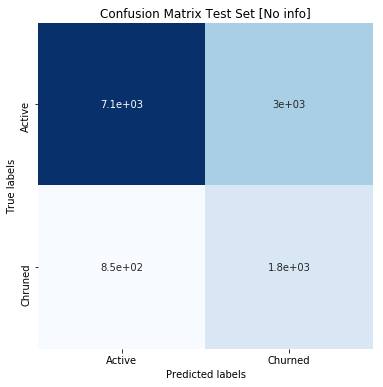

In [313]:
from sklearn.metrics import confusion_matrix, classification_report
axis = plt.figure(figsize=(6,6))
log_pred = log_model.predict(X_test_no_scaled)
cm = confusion_matrix(y_test_no,log_pred)
ax = plt.subplot()
sns.heatmap(cm, annot=True, ax = ax,cmap='Blues',cbar=False)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix Test Set [No info]')
ax.xaxis.set_ticklabels(['Active', 'Churned'])
ax.yaxis.set_ticklabels(['Active', 'Chruned'])
print(cm)
print('\n')
print(classification_report(y_test_no,log_pred))

In [314]:
prob_class_active = []
prob_class_churned = []
for x in log_model.predict_proba(X_test_no_scaled):
    prob_class_active.append(x[0])
    prob_class_churned.append(x[1])
df_test_no_info['Prob_Active_Log'] = prob_class_active
df_test_no_info['Prob_Churned_Log'] = prob_class_churned
#X_train.head()

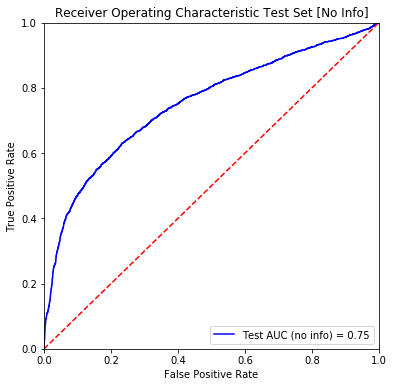

In [315]:
from sklearn import metrics
fpr, tpr, threshold = metrics.roc_curve(y_test_no, df_test_no_info['Prob_Churned_Log'], pos_label=1)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
axis = plt.figure(figsize=(6,6))
plt.title('Receiver Operating Characteristic Test Set [No Info]')
plt.plot(fpr, tpr, 'b', label = 'Test AUC (no info) = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

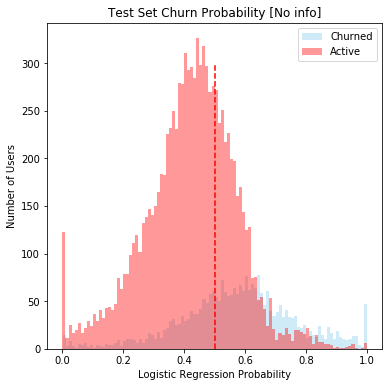

In [316]:
axis = plt.figure(figsize=(6,6))
sns.distplot( df_test_no_info['Prob_Churned_Log'][df_test_no_info['isChurned'] == 1] , color="skyblue", label="Churned",bins=100,kde=False)
sns.distplot( df_test_no_info['Prob_Churned_Log'][df_test_no_info['isChurned'] == 0] , color="red", label="Active",bins=100,kde=False)
plt.legend()
plt.plot([0.5, 0.5], [0, 300],'r--')
plt.ylabel("Number of Users")
plt.xlabel("Logistic Regression Probability")
plt.title("Test Set Churn Probability [No info]")
plt.show()

[[7492 3138]
 [3246 7384]]


              precision    recall  f1-score   support

           0       0.70      0.70      0.70     10630
           1       0.70      0.69      0.70     10630

   micro avg       0.70      0.70      0.70     21260
   macro avg       0.70      0.70      0.70     21260
weighted avg       0.70      0.70      0.70     21260



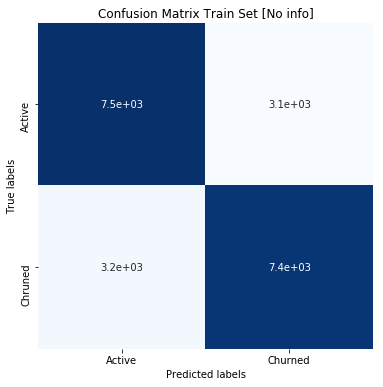

In [317]:
log_pred = log_model.predict(X_train_no_scaled)
axis = plt.figure(figsize=(6,6))
cm = confusion_matrix(y_train_no,log_pred)
ax = plt.subplot()
sns.heatmap(cm, annot=True, ax = ax,cmap='Blues',cbar=False)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix Train Set [No info]')
ax.xaxis.set_ticklabels(['Active', 'Churned'])
ax.yaxis.set_ticklabels(['Active', 'Chruned'])
print(cm)
print('\n')
print(classification_report(y_train_no,log_pred))

In [318]:
prob_class_active = []
prob_class_churned = []
for x in log_model.predict_proba(X_train_no_scaled):
    prob_class_active.append(x[0])
    prob_class_churned.append(x[1])
df_train_no_info['Prob_Active_Log'] = prob_class_active
df_train_no_info['Prob_Churned_Log'] = prob_class_churned
#X_train.head()

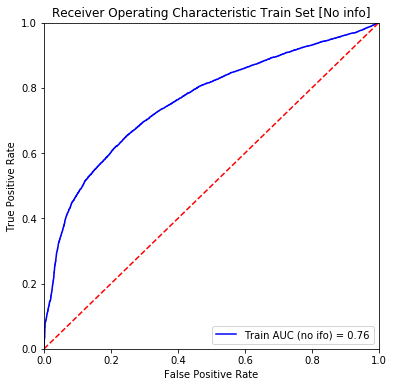

In [319]:
fpr, tpr, threshold = metrics.roc_curve(y_train_no, df_train_no_info['Prob_Churned_Log'], pos_label=1)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
axis = plt.figure(figsize=(6,6))
plt.title('Receiver Operating Characteristic Train Set [No info]')
plt.plot(fpr, tpr, 'b', label = 'Train AUC (no ifo) = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

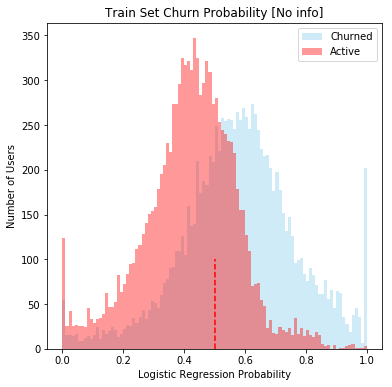

In [321]:
axis = plt.figure(figsize=(6,6))
sns.distplot( df_train_no_info['Prob_Churned_Log'][df_train_no_info['isChurned'] == 1] , color="skyblue", label="Churned",bins=100,kde=False)
sns.distplot( df_train_no_info['Prob_Churned_Log'][df_train_no_info['isChurned'] == 0] , color="red", label="Active",bins=100,kde=False)
plt.legend()
plt.plot([0.5, 0.5], [0, 100],'r--')
plt.ylabel("Number of Users")
plt.xlabel("Logistic Regression Probability")
plt.title("Train Set Churn Probability [No info]")
plt.show()

In [322]:
for i in range(0,len(log_model.coef_[0])):
    print([X_train_no.columns[i],abs(log_model.coef_[0][i])])

['num_Friends', 0.45743388813113556]
['newest_friend_time', 1.2288548493007887]
['oldest_friend_time', 0.10821358469787017]
['commentpermission', 0.020232928747701447]
['profilestate', 0.14338880722723407]
['timecreated', 0.11707142462224712]
['costom_avatar', 0.24119520057703422]
['playtime_forever_sum', 0.0]
['playtime_forever_std', 0.0]
['playtime_forever_max', 0.0]
['appid_count_noZero', 0.0]
['playtime_forever_mean_noZero', 0.0]
['playtime_forever_std_noZero', 0.0]
['num_Friends_friends_mean', 0.06756837831809419]
['costom_avatar_friends_mean', 1.3445653258721528]
['playtime_forever_sum_friends_mean', 0.03146214489027256]
['appid_count_noZero_friends_mean', 0.03902344432488912]
['playtime_forever_mean_noZero_friends_mean', 0.028054481637802914]
['Same_fav_as_friend', 0.09900495165119277]
['num_Zero_games', 0.0]
